## Business Problem:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

## Reading the Dataset

#### Importing relevant libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

pd.options.display.max_colwidth = 200
pd.options.display.max_rows=100
pd.options.display.max_columns=500

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading the dataset:
house = pd.read_csv('train.csv')
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

#### Performing the Sanity Checks

In [ ]:
house.shape

(1460, 81)

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
house.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [ ]:
#checking the null values:
null_data = round(house.isnull().mean()*100,2)
null_data[null_data>0]

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [ ]:
#dropping the id column since it has no significance:
house.drop('Id', axis=1, inplace=True)

In [ ]:
#Seperating the categorical and numerical variables into seperate variables for ease

cat_cols = house.select_dtypes(exclude=[np.number]).columns.to_list()
num_cols = house.select_dtypes(include=[np.number]).columns.to_list()

#checking values of categorical variables
for col in cat_cols:
    print(col,': ',house[col].unique())

MSZoning :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street :  ['Pave' 'Grvl']
Alley :  [nan 'Grvl' 'Pave']
LotShape :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour :  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities :  ['AllPub' 'NoSeWa']
LotConfig :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope :  ['Gtl' 'Mod' 'Sev']
Neighborhood :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType :  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle :  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl :  ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'

### EDA

###### Categorical Variables

In [ ]:
# checking categorical variables using countplot:

def count_cat(df, col):
    plt.figure(figsize=[10,4])
    plt.style.use('Solarize_Light2')
    
    sns.countplot(data=df, x=col)
    plt.title(f'Plot of {col}')
    plt.show()

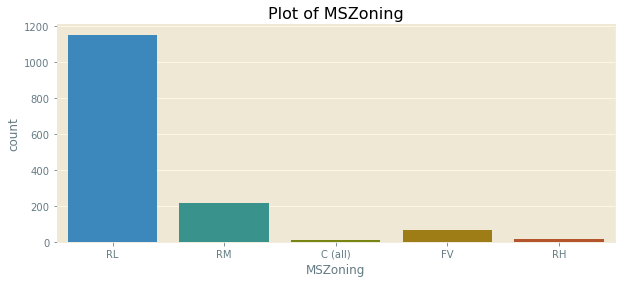

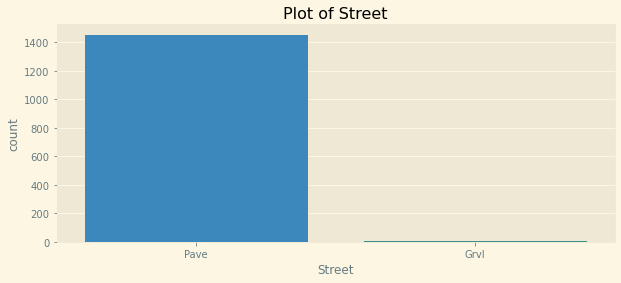

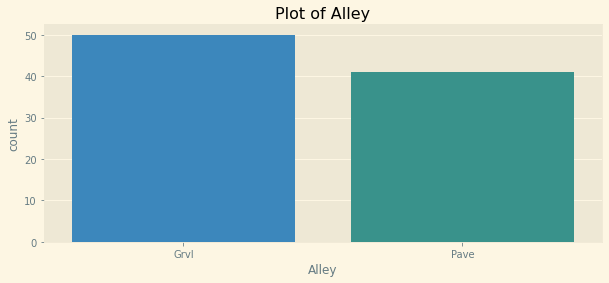

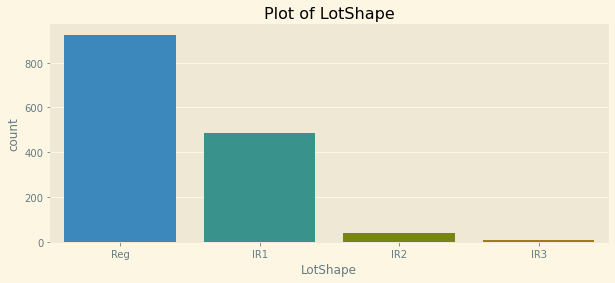

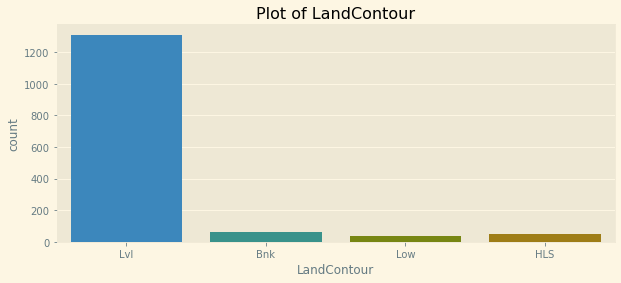

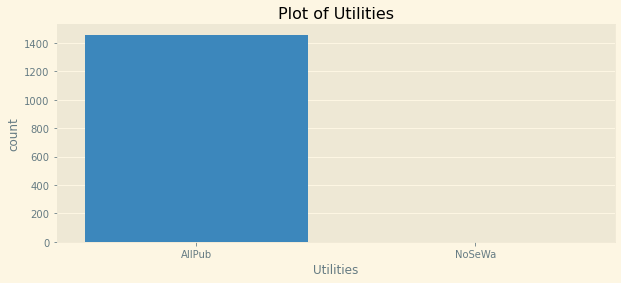

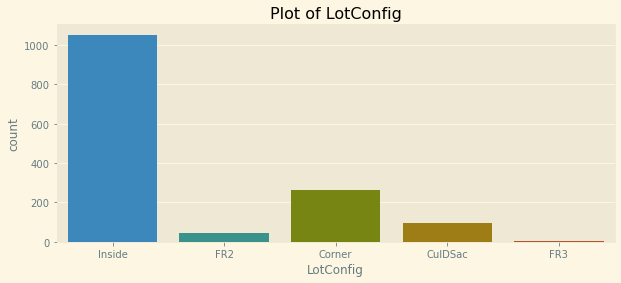

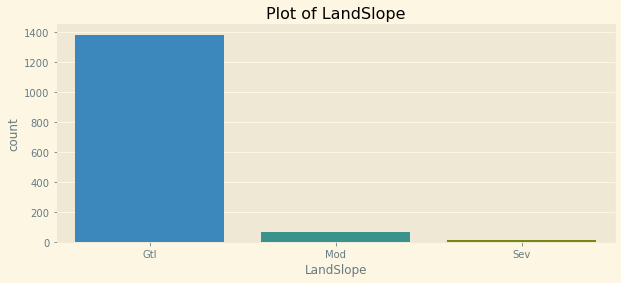

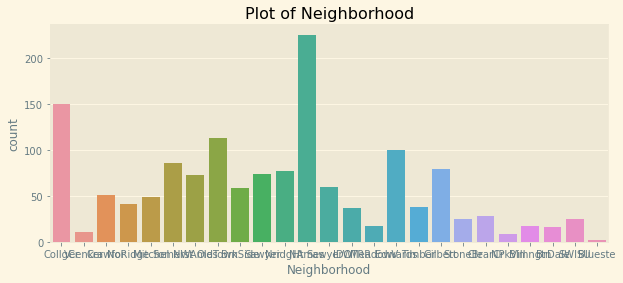

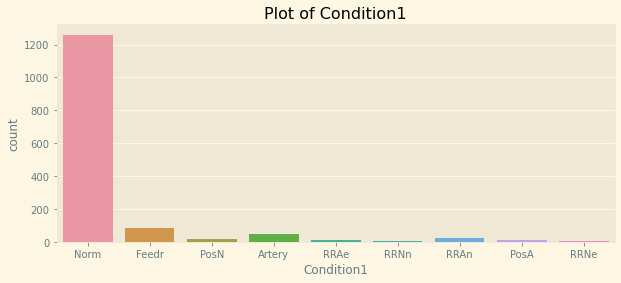

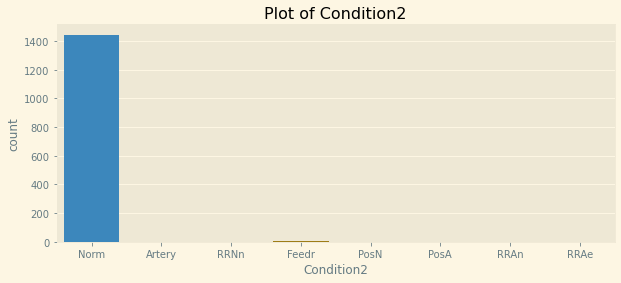

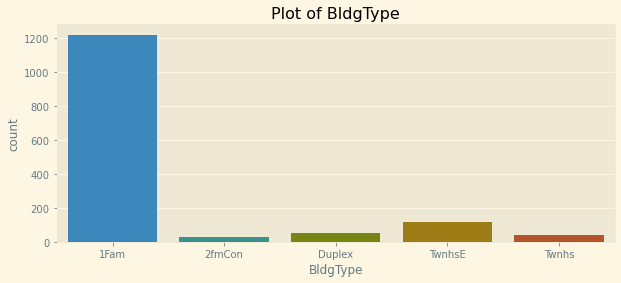

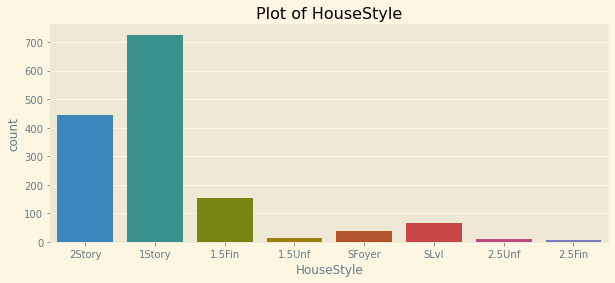

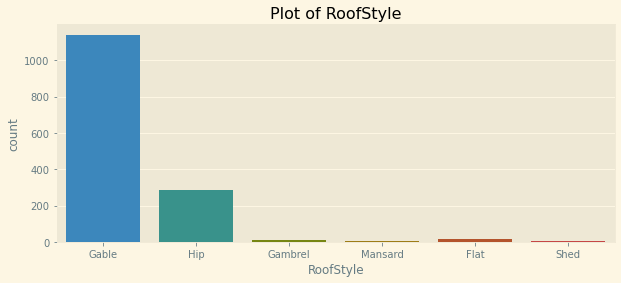

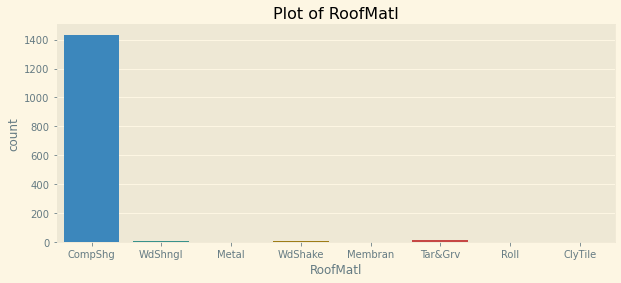

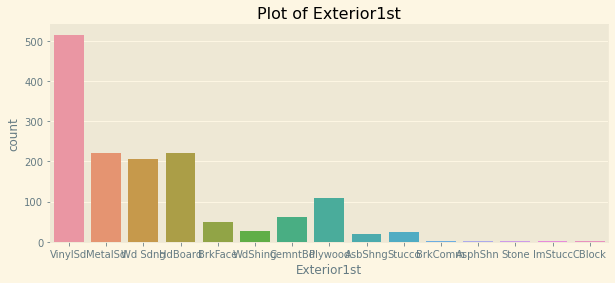

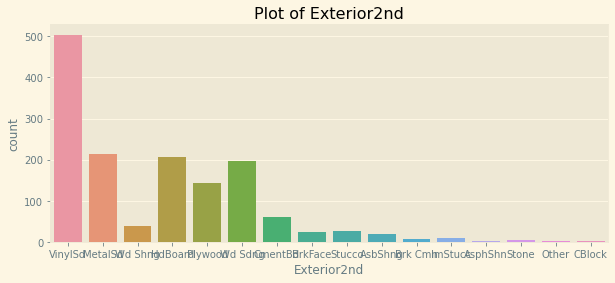

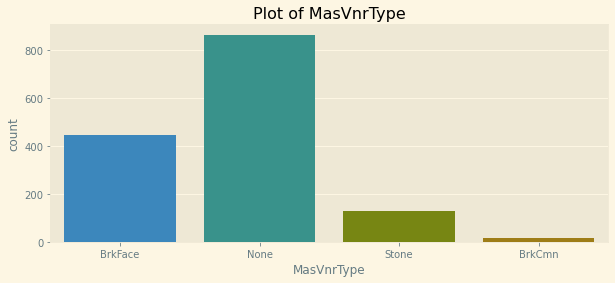

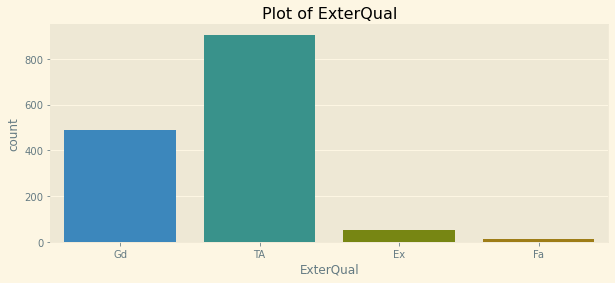

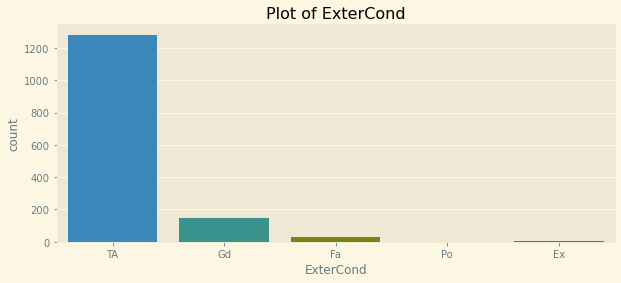

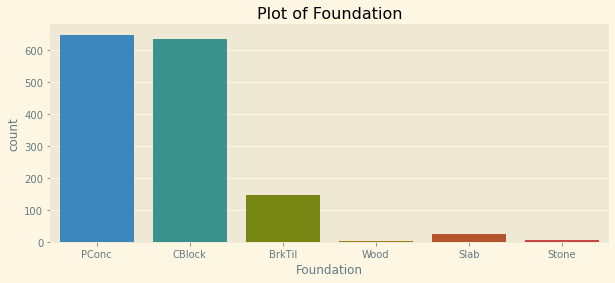

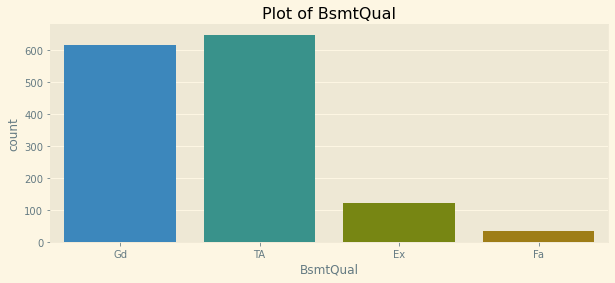

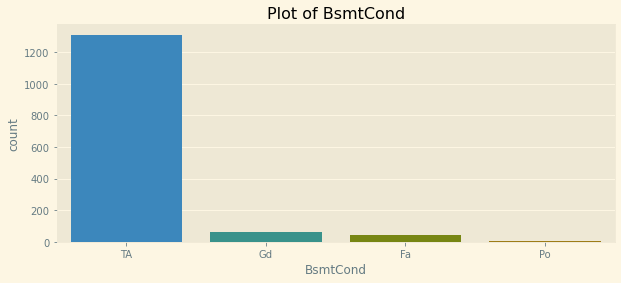

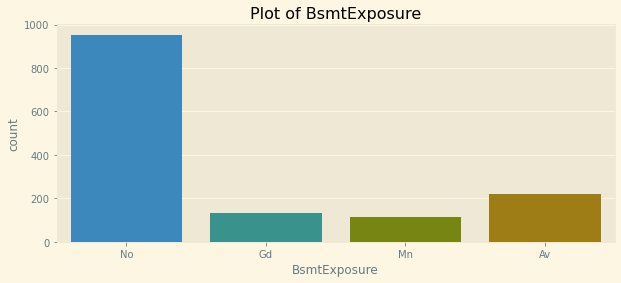

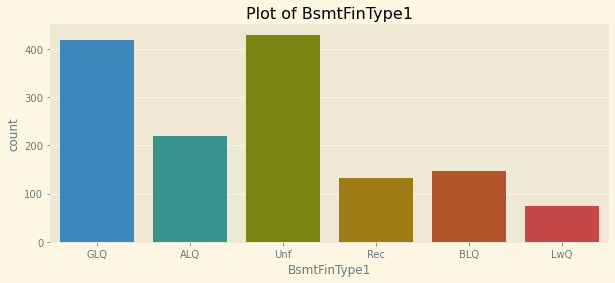

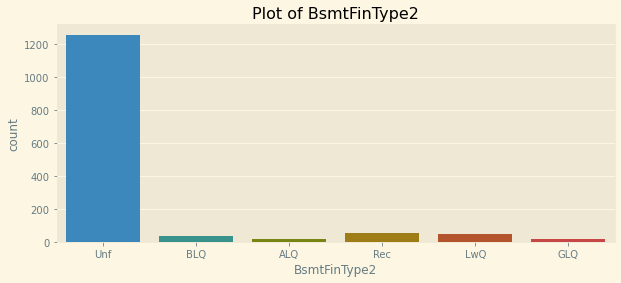

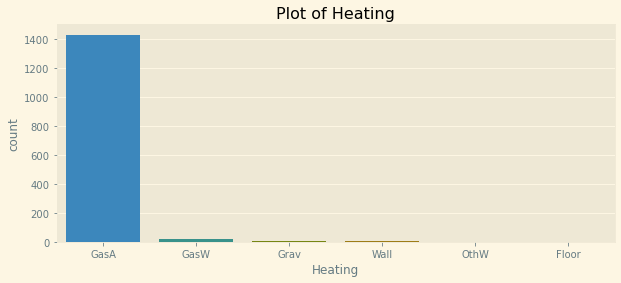

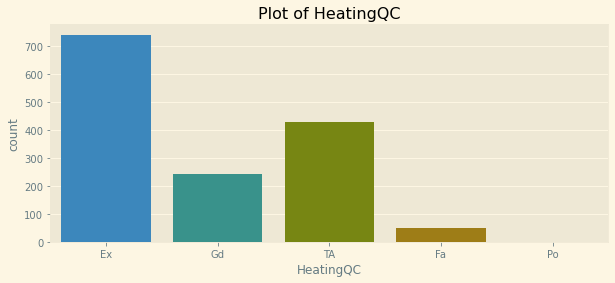

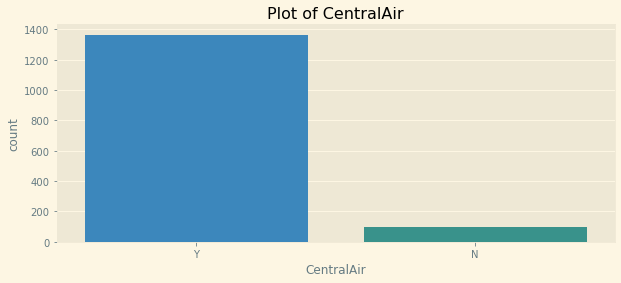

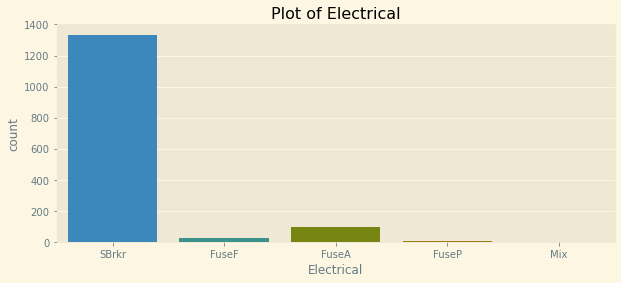

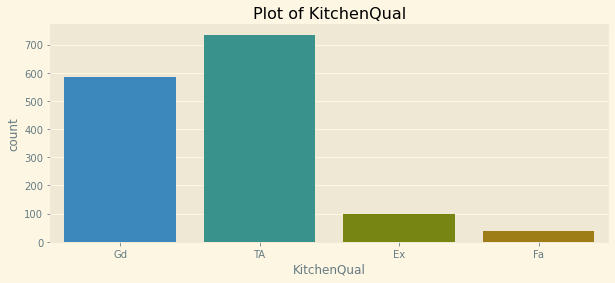

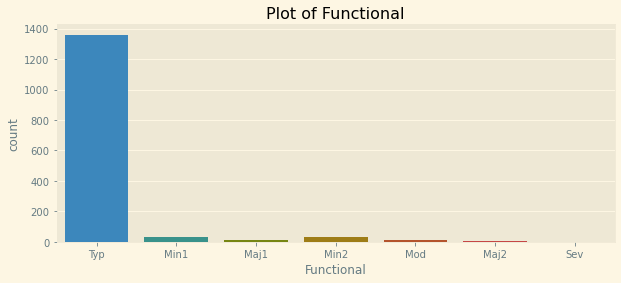

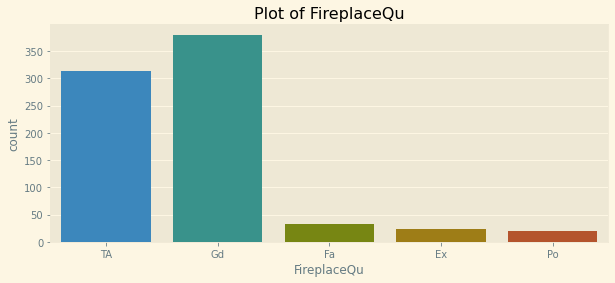

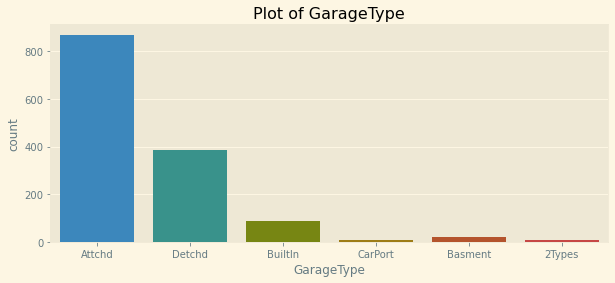

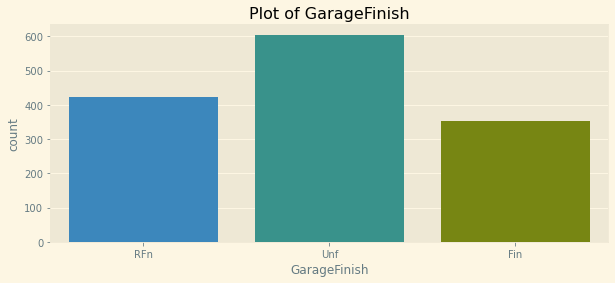

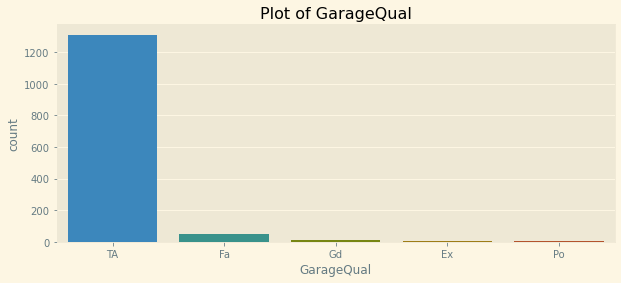

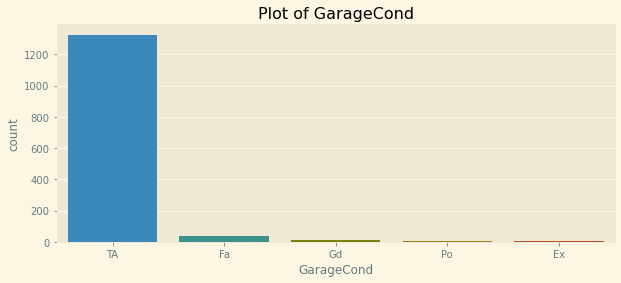

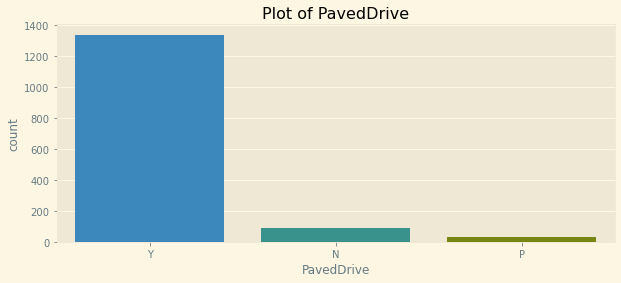

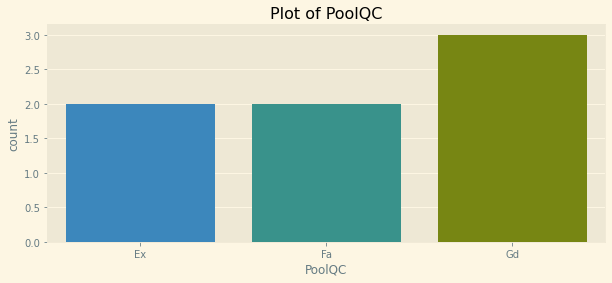

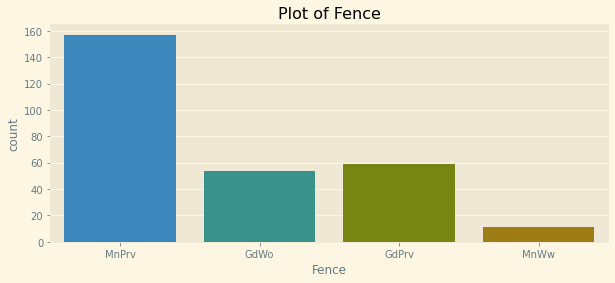

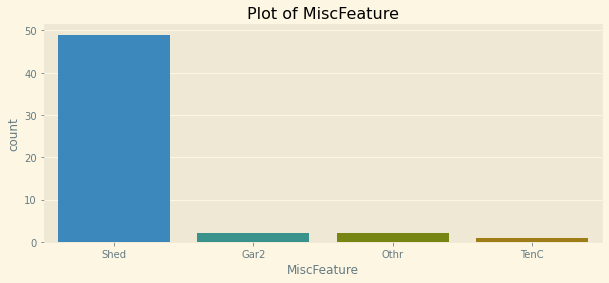

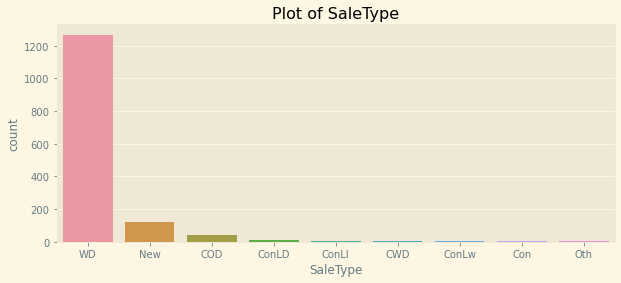

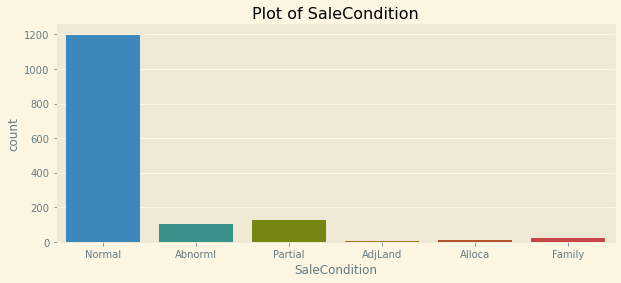

In [ ]:
for c in cat_cols:
    count_cat(house, c)

inferences:
- There are many features where more than 80% data belongs to one particular category like `Street`, `LandContour`, `Utilities`, `Condition1`, `Condition2`, `RoofMatl`, `Functional`, `GarageQual`etc
- GarageType has maximum `Attchd` value indicating that most houses have attached garage
- Most house have average or good qualtiy of kitchen
- Many columns are highly skewed indicating that these might not come into our final model

In [ ]:
# checking categorical variables using boxplot:

def box(df, col):
    plt.figure(figsize=[12,7])
    plt.style.use('Solarize_Light2')
    
    sns.boxplot(data = df, x=col, y='SalePrice')
    plt.title(f'Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

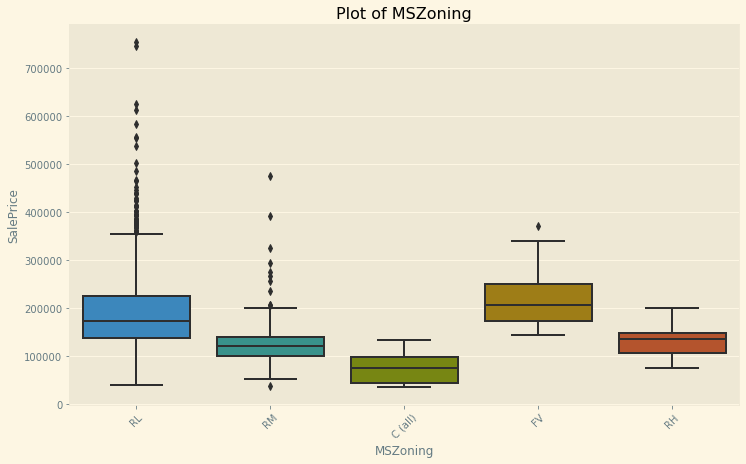

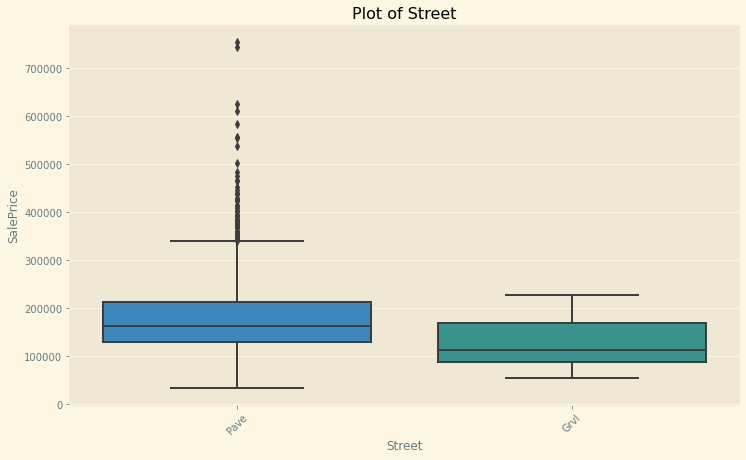

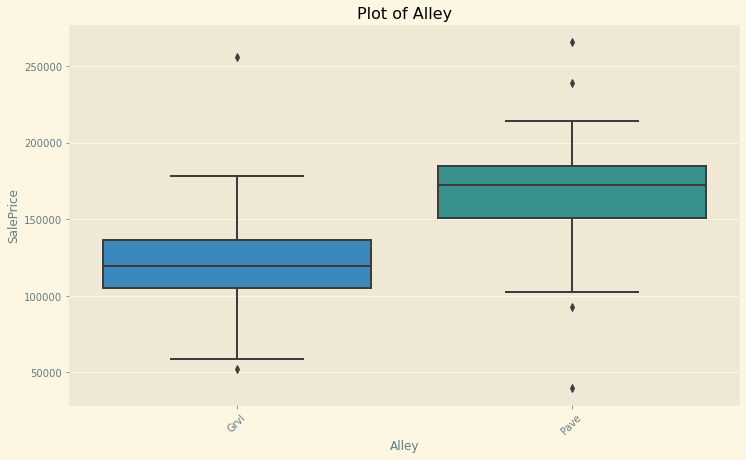

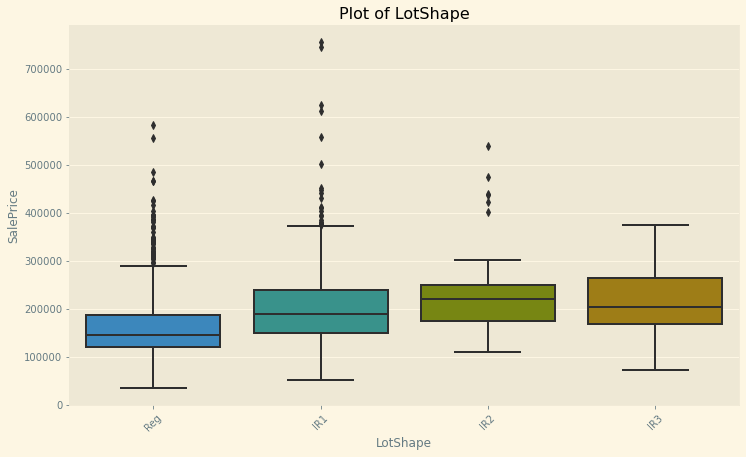

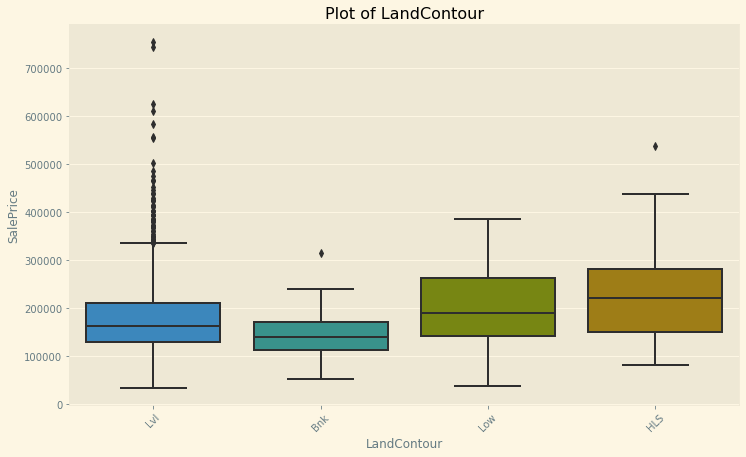

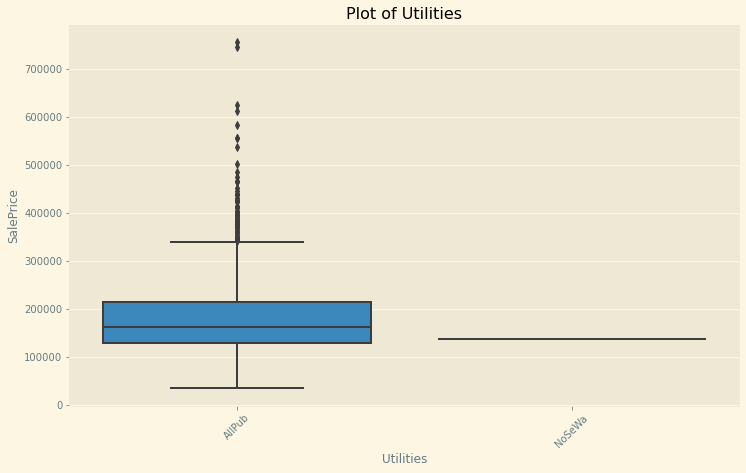

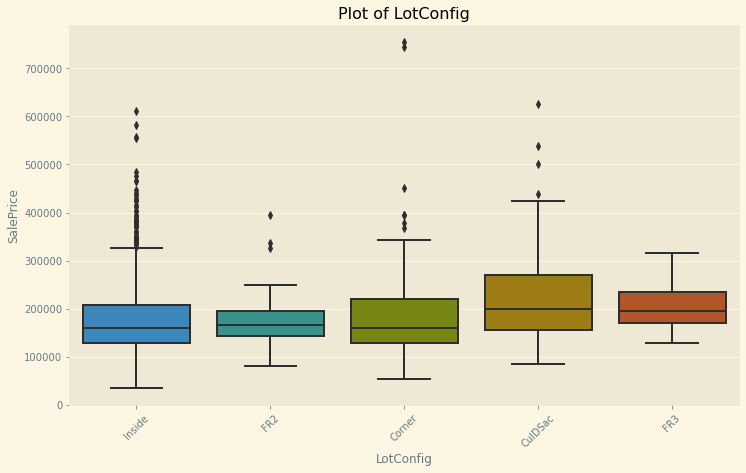

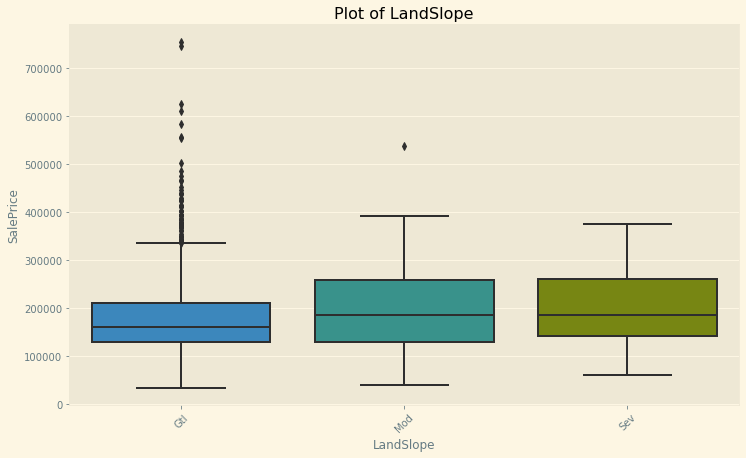

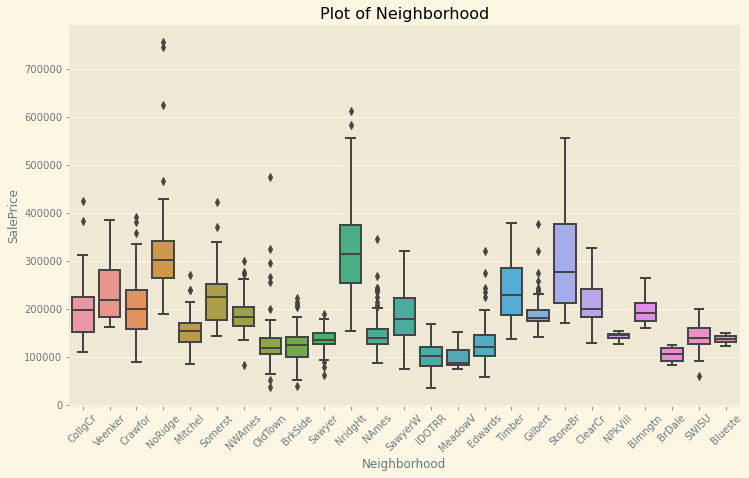

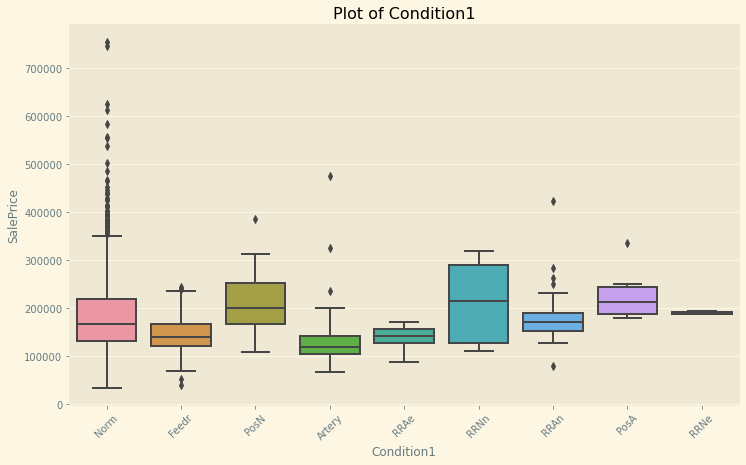

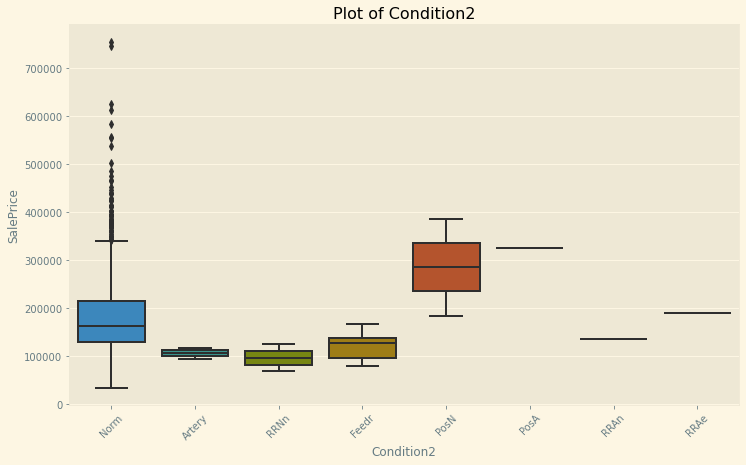

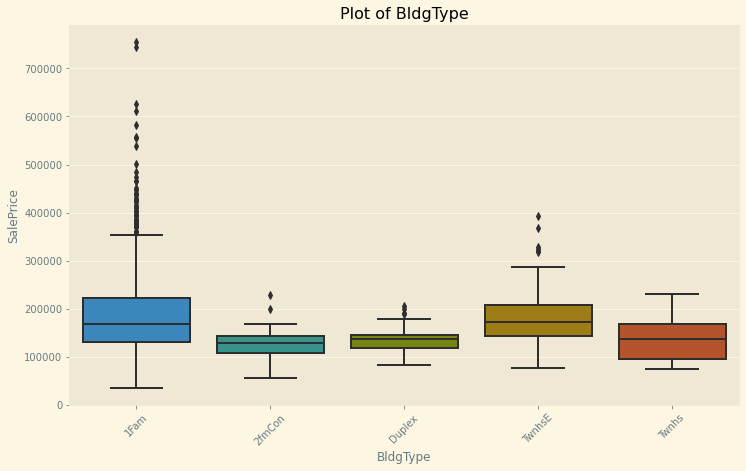

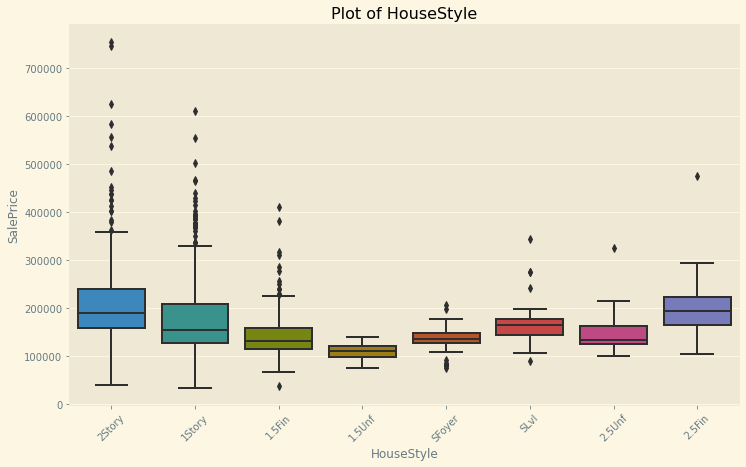

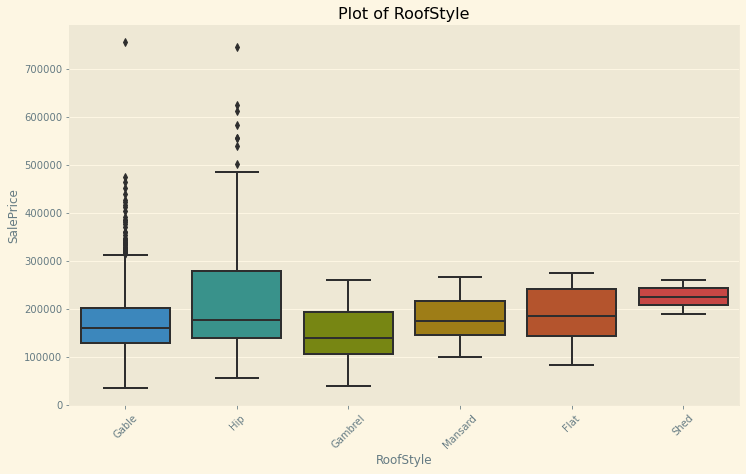

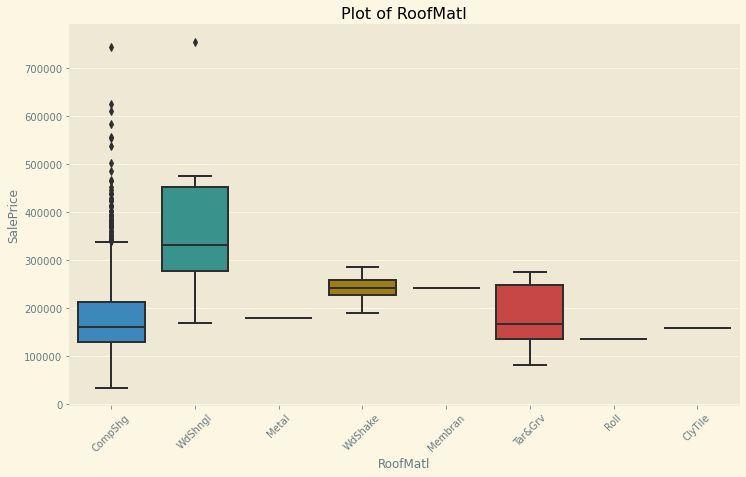

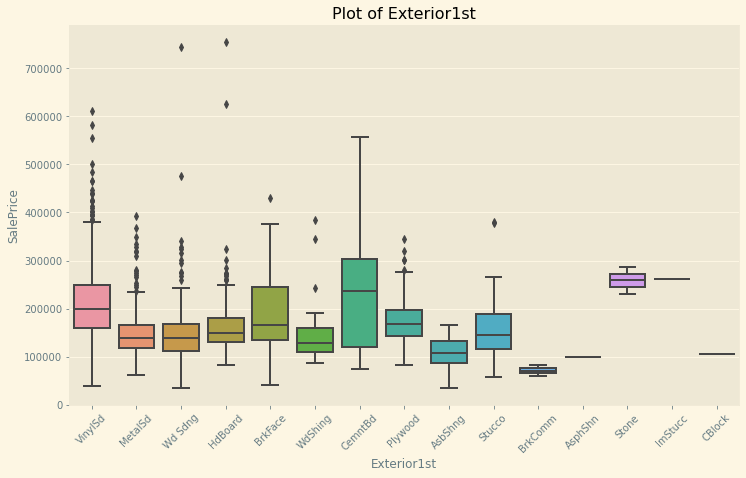

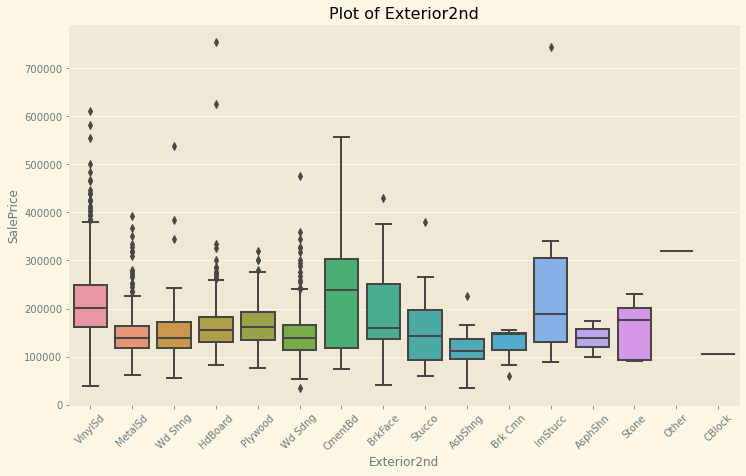

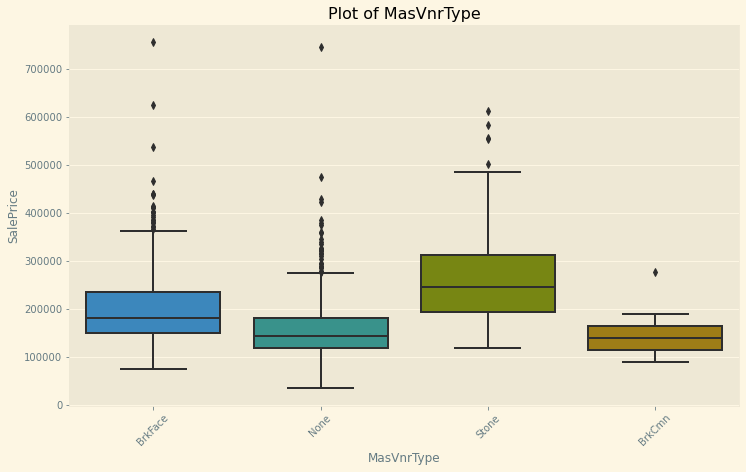

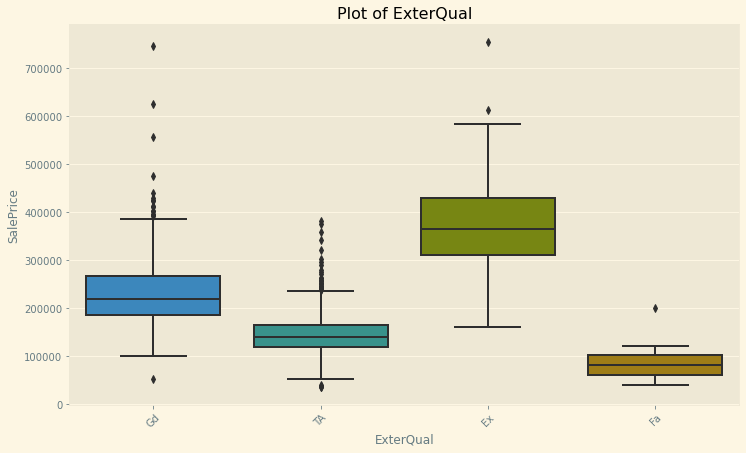

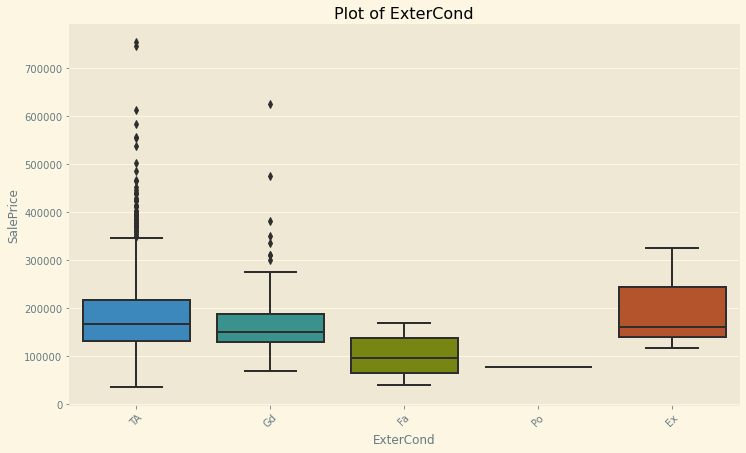

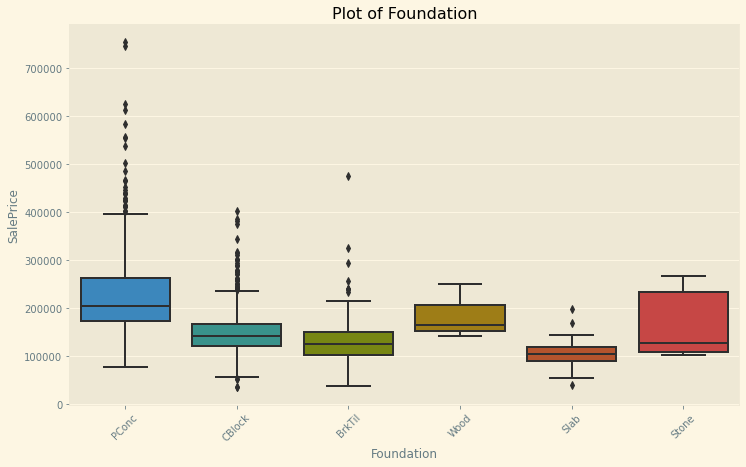

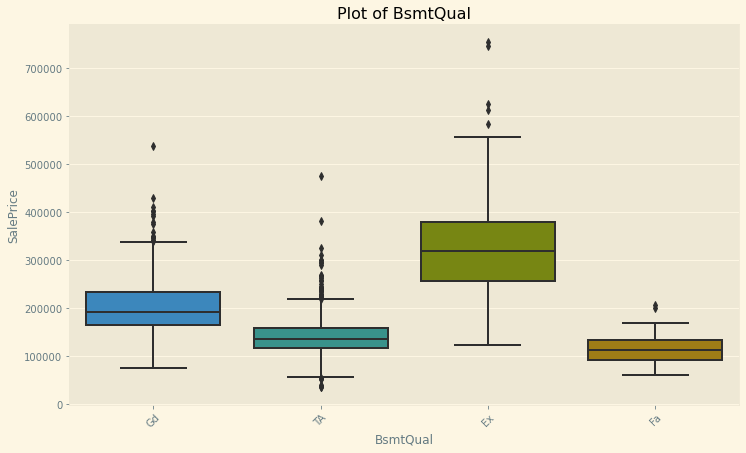

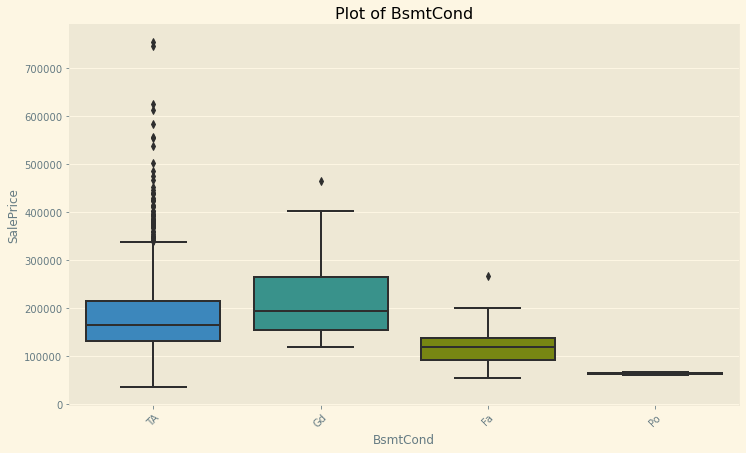

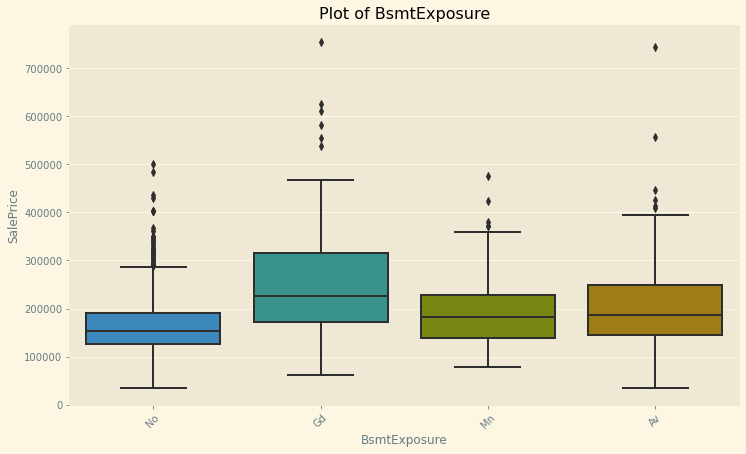

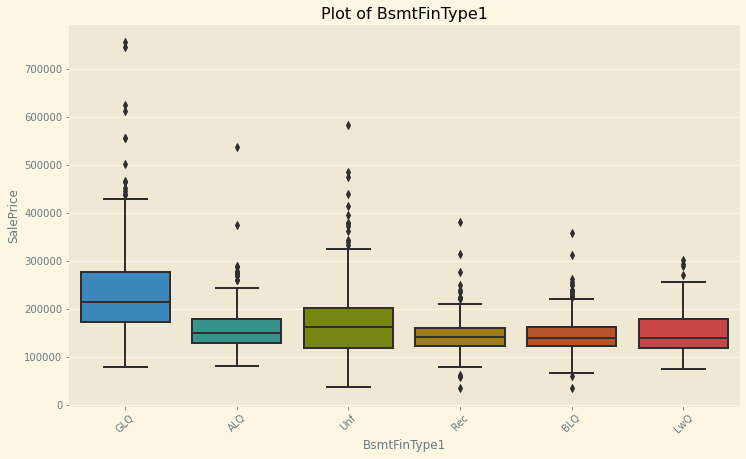

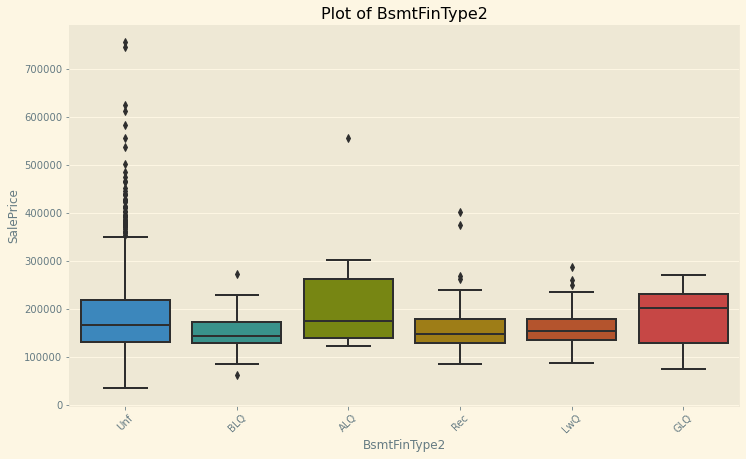

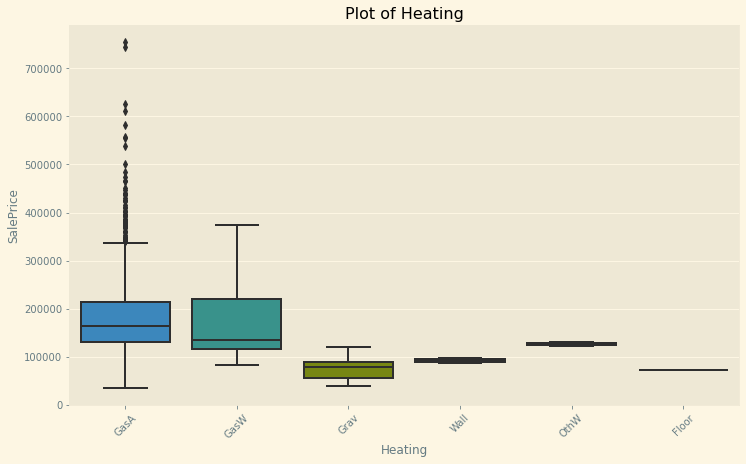

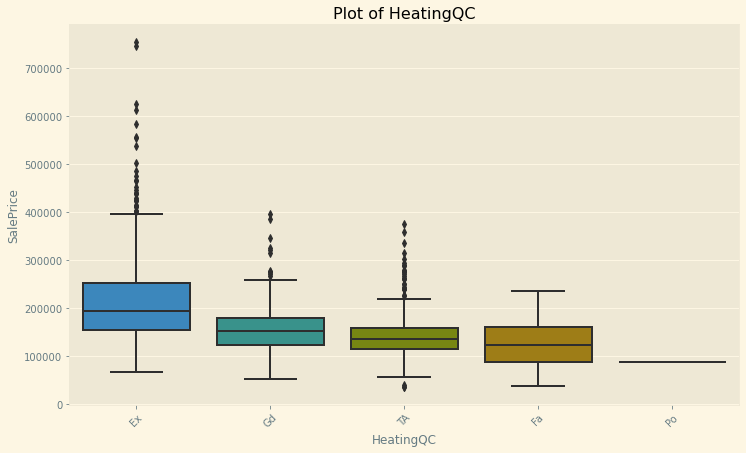

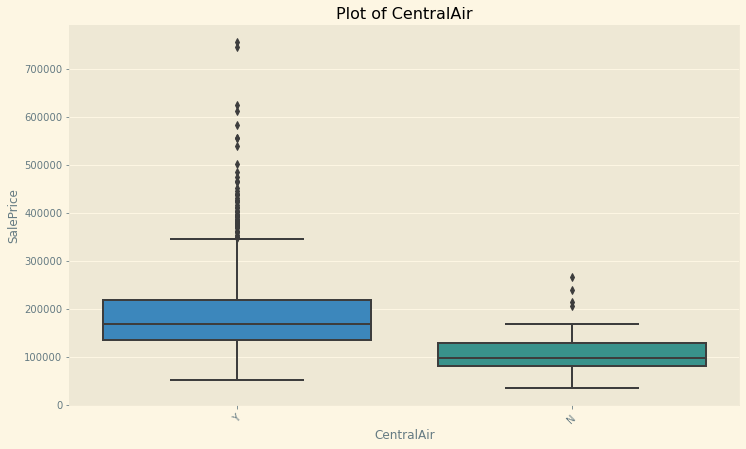

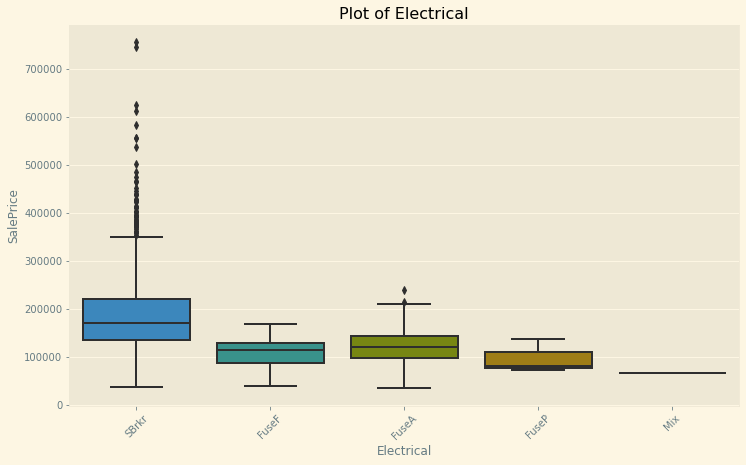

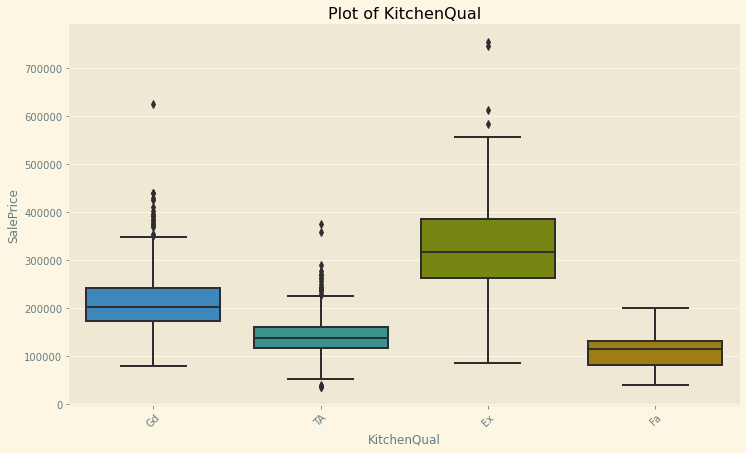

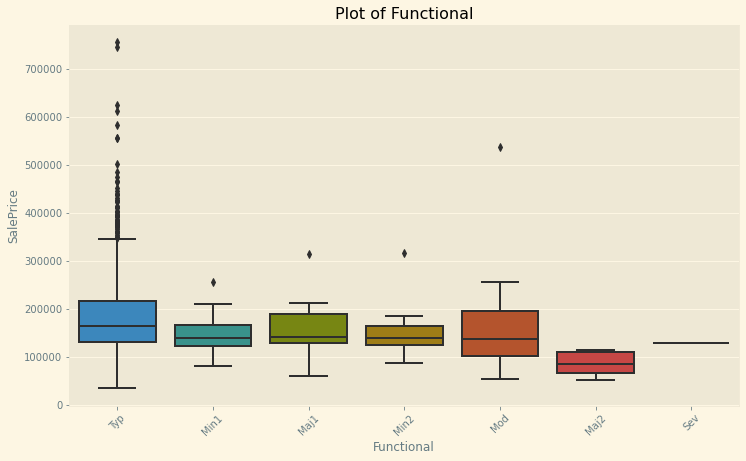

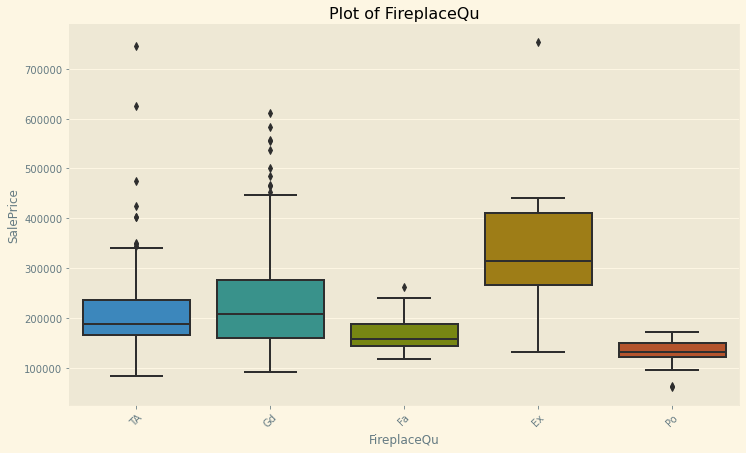

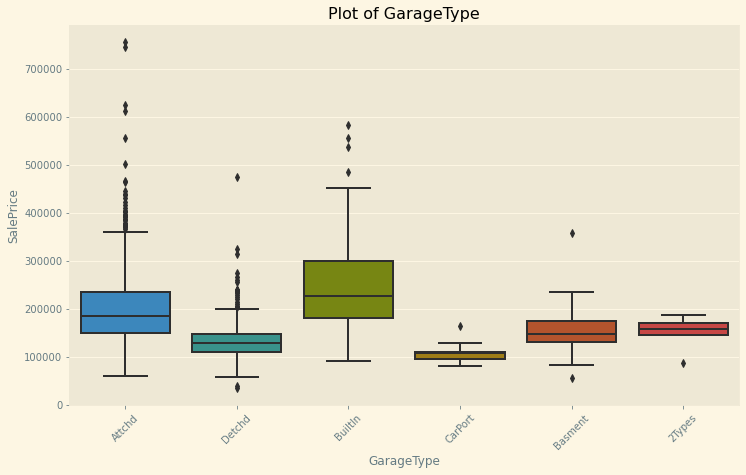

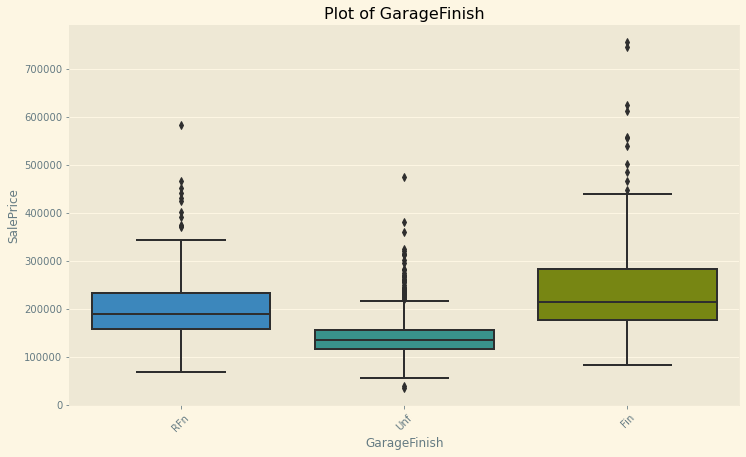

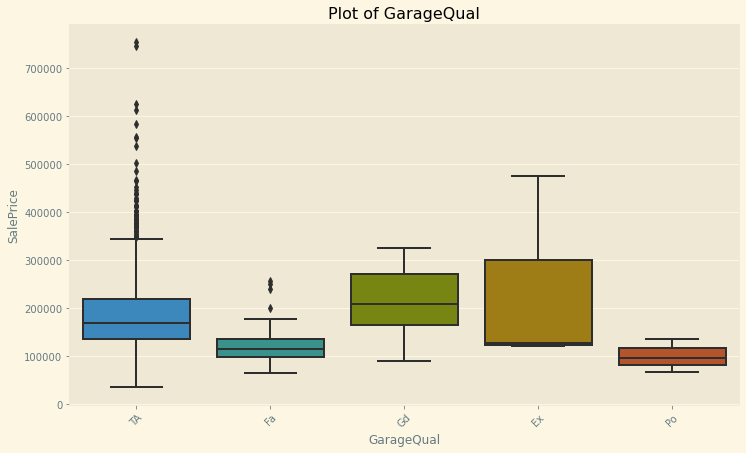

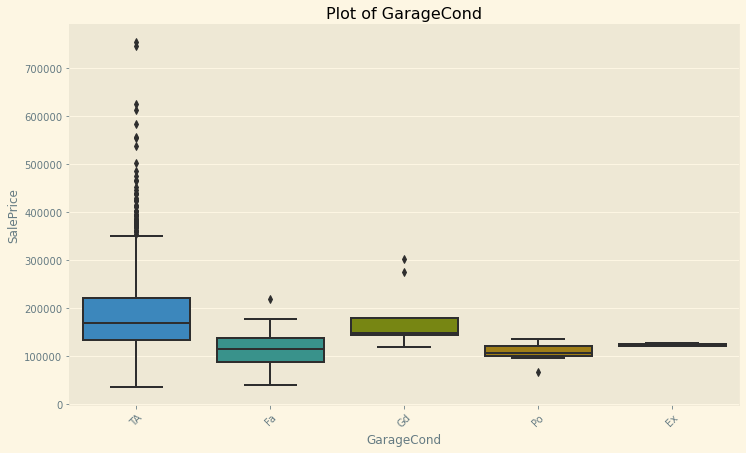

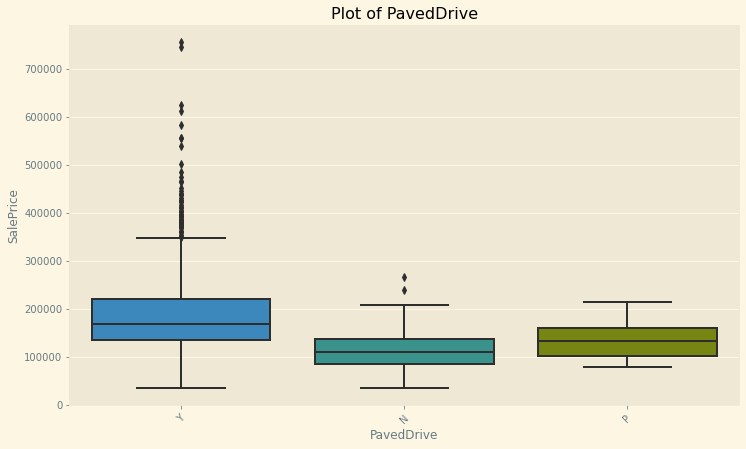

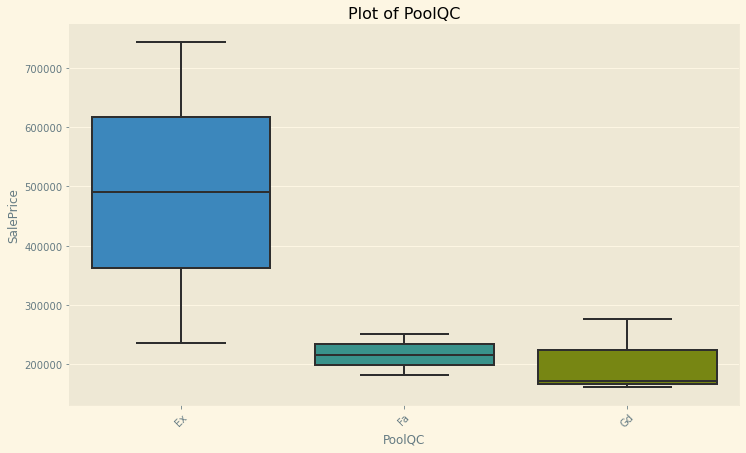

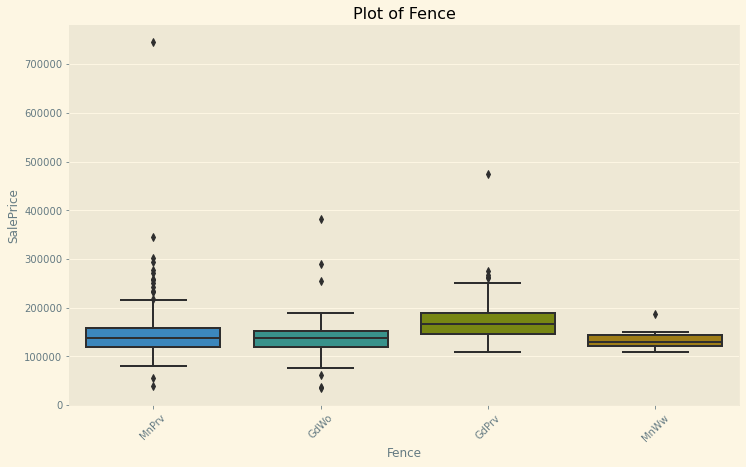

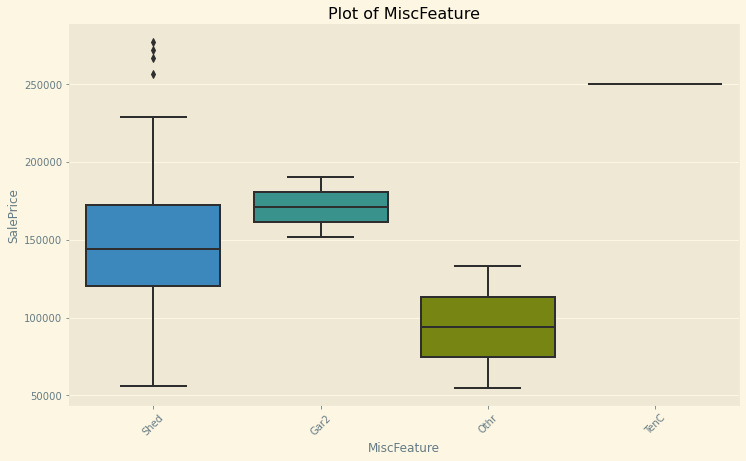

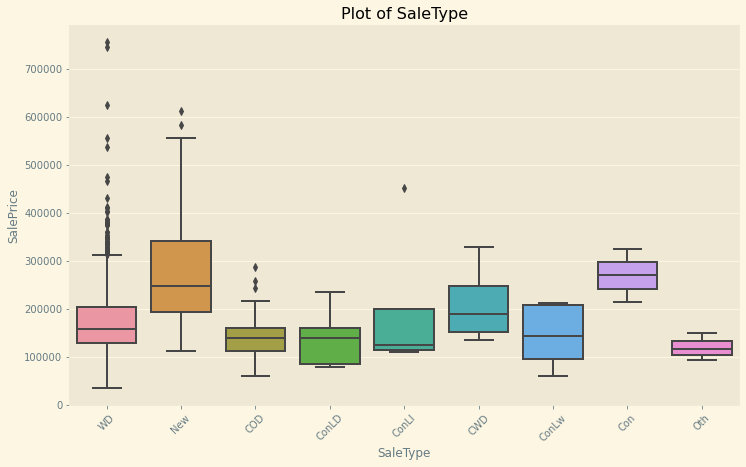

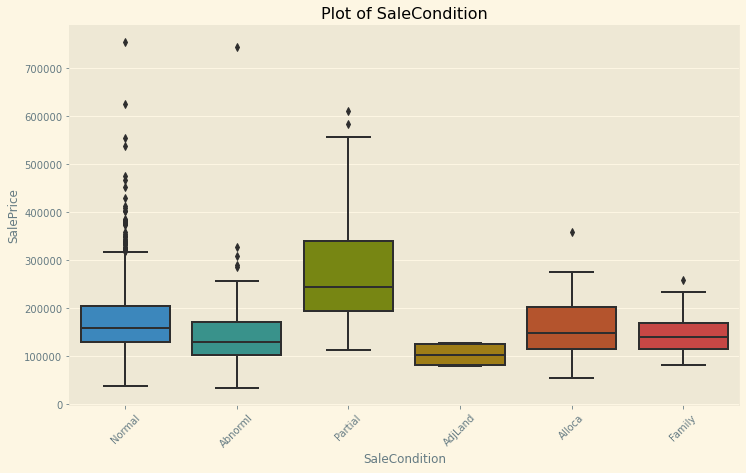

In [ ]:
for c in cat_cols:
    box(house, c)

Inference:
- We can observe some outliers present in features like `MSZoning`, `Alley`, `LotConfig`, `Neighborhood`, `RoofMatl`, `Exterior1st`, `Exterior2nd`, `ExterQual`, `BsmtExposure`, `Functional`, `SaleCondition` etc

###### Numerical Variables

In [ ]:
#defining a function to compute the jointplot of numerical columns and target variable

def num_viz(df, col):
    plt.figure(figsize=(10,8))
    plt.style.use('Solarize_Light2')
    
    sns.jointplot(data = df, x=col, y='SalePrice')
    plt.title(f'Plot of {col}')
    plt.show()

<Figure size 720x576 with 0 Axes>

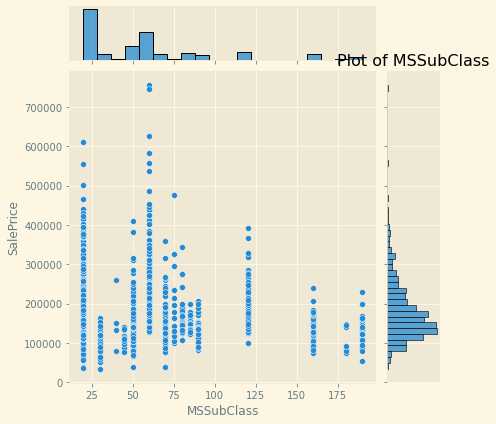

<Figure size 720x576 with 0 Axes>

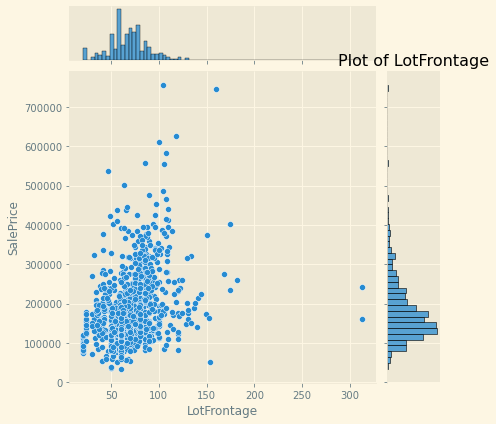

<Figure size 720x576 with 0 Axes>

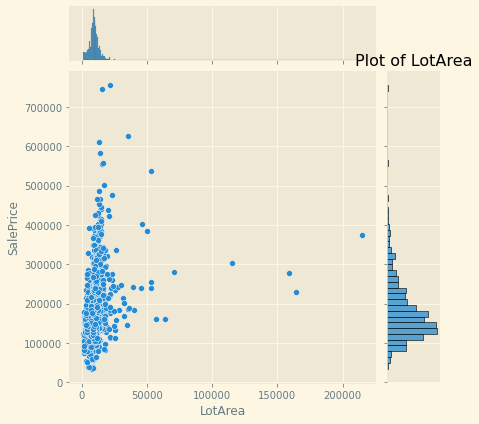

<Figure size 720x576 with 0 Axes>

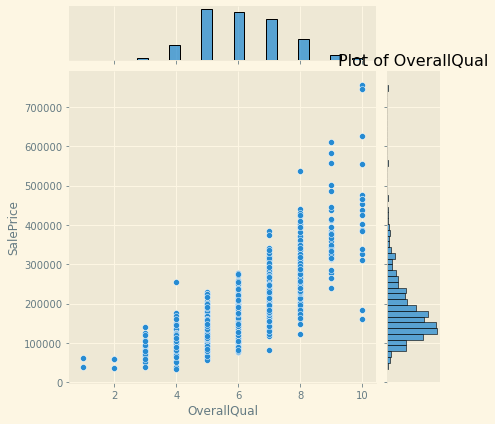

<Figure size 720x576 with 0 Axes>

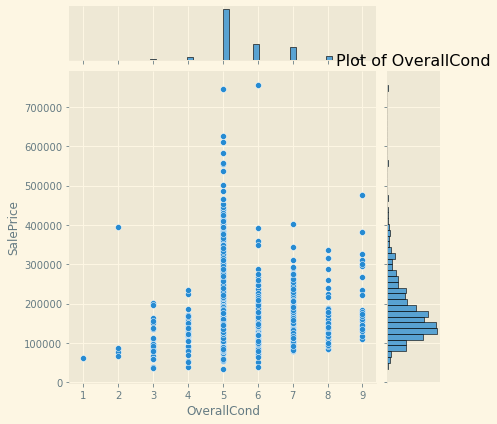

<Figure size 720x576 with 0 Axes>

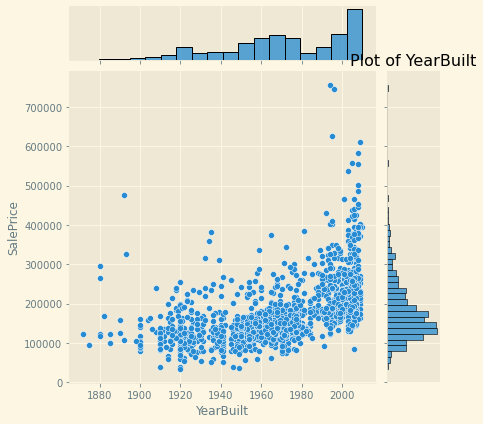

<Figure size 720x576 with 0 Axes>

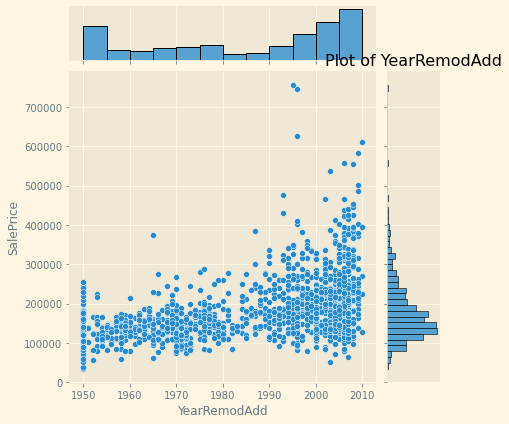

<Figure size 720x576 with 0 Axes>

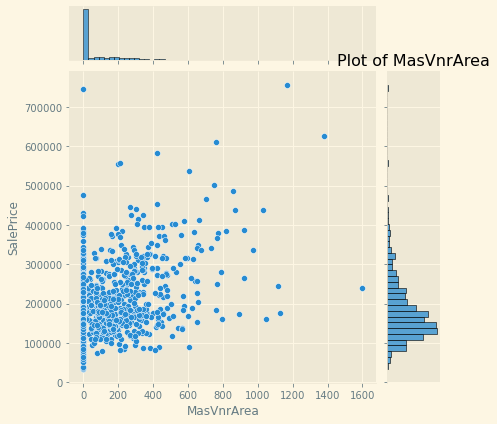

<Figure size 720x576 with 0 Axes>

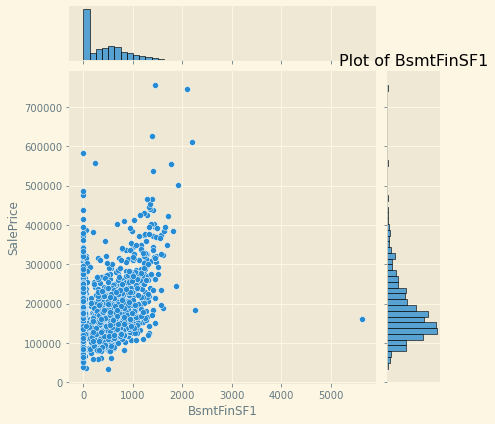

<Figure size 720x576 with 0 Axes>

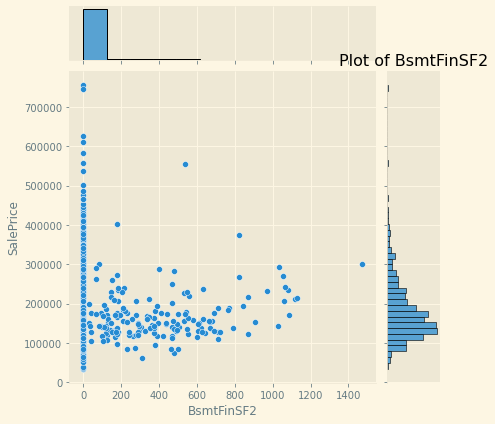

<Figure size 720x576 with 0 Axes>

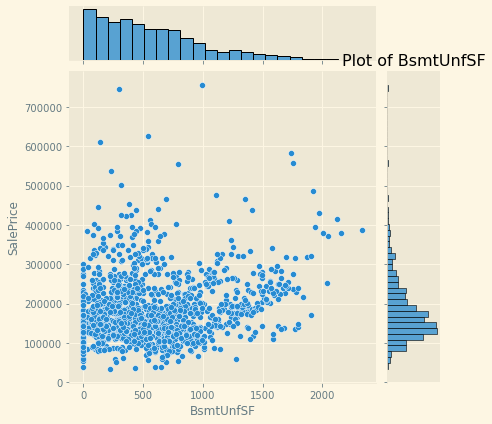

<Figure size 720x576 with 0 Axes>

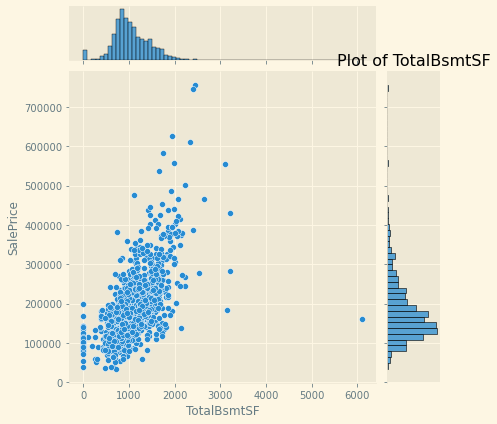

<Figure size 720x576 with 0 Axes>

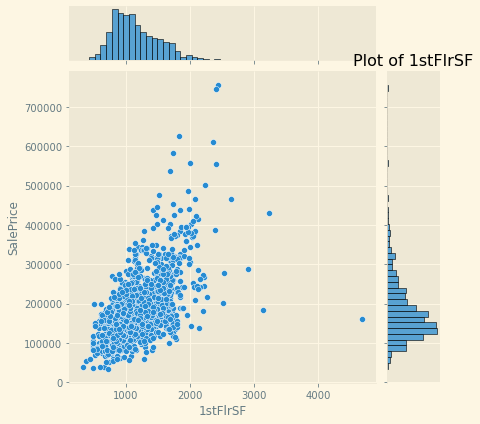

<Figure size 720x576 with 0 Axes>

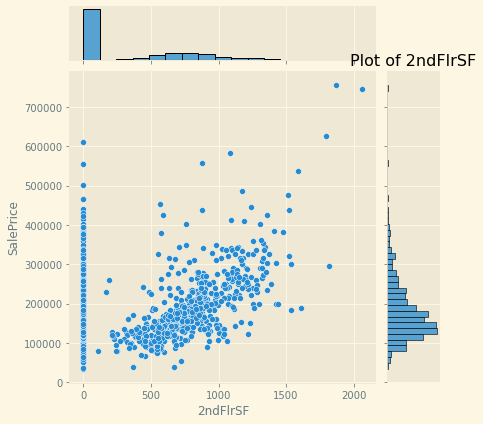

<Figure size 720x576 with 0 Axes>

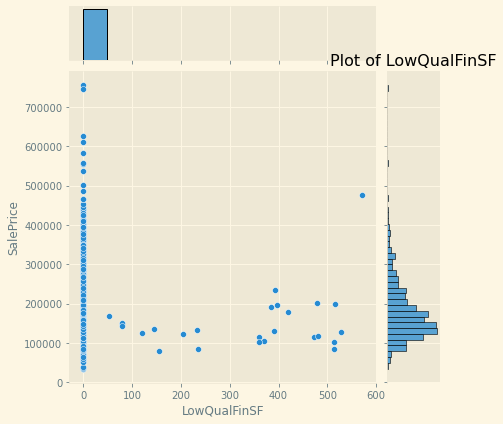

<Figure size 720x576 with 0 Axes>

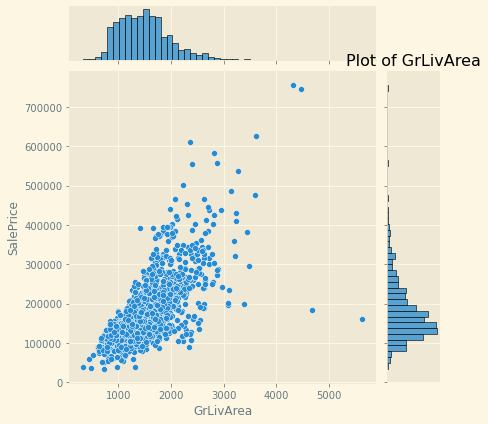

<Figure size 720x576 with 0 Axes>

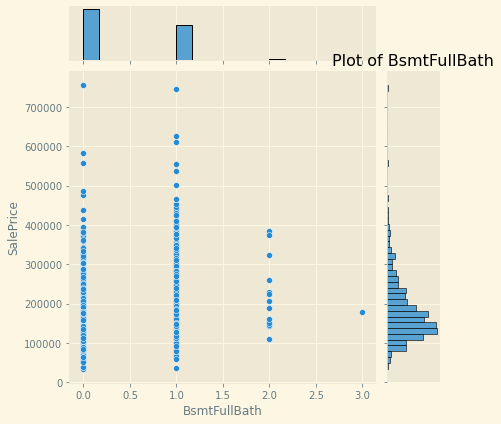

<Figure size 720x576 with 0 Axes>

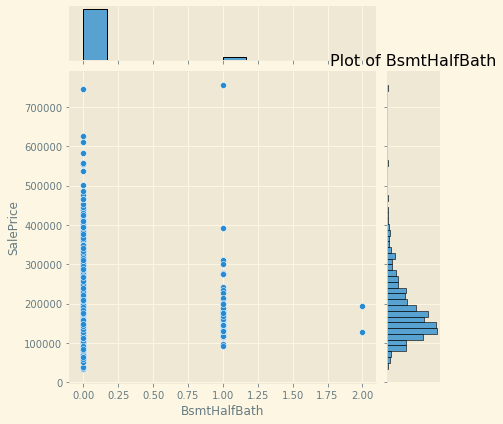

<Figure size 720x576 with 0 Axes>

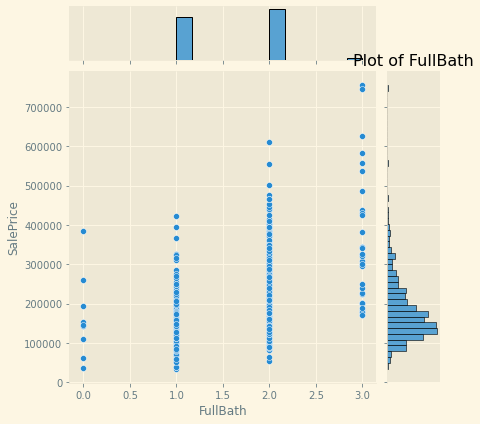

<Figure size 720x576 with 0 Axes>

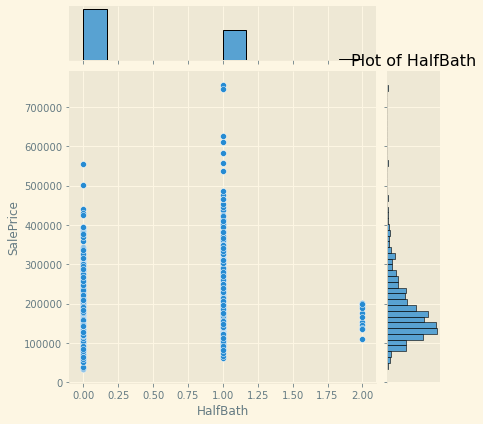

<Figure size 720x576 with 0 Axes>

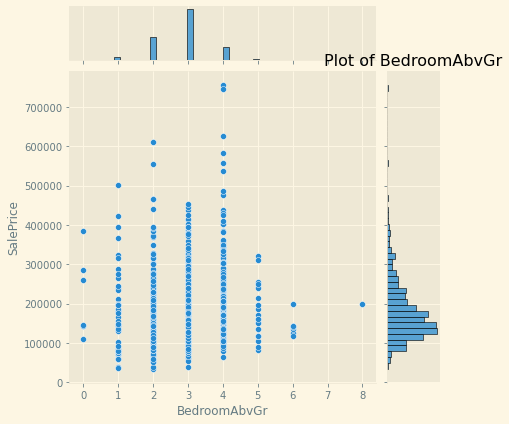

<Figure size 720x576 with 0 Axes>

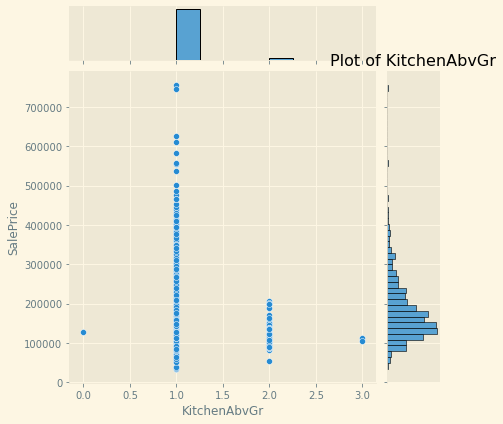

<Figure size 720x576 with 0 Axes>

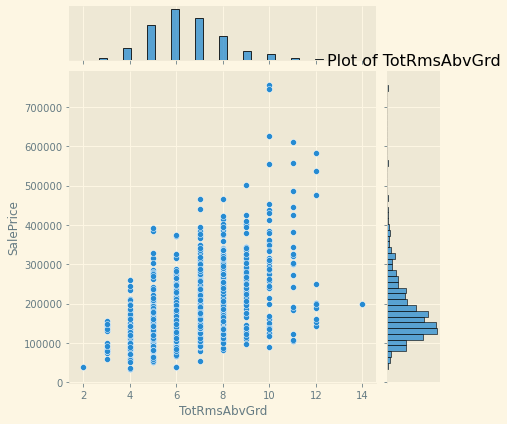

<Figure size 720x576 with 0 Axes>

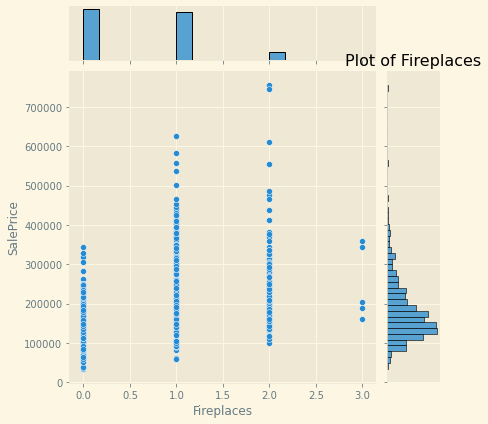

<Figure size 720x576 with 0 Axes>

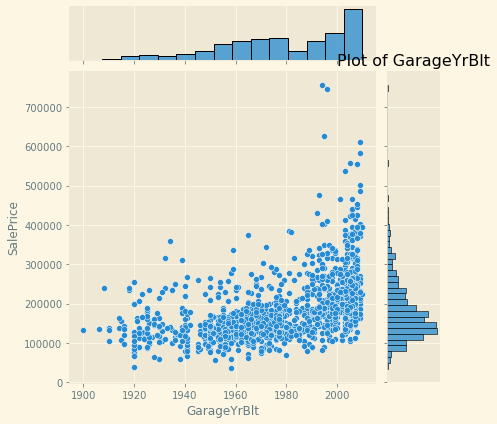

<Figure size 720x576 with 0 Axes>

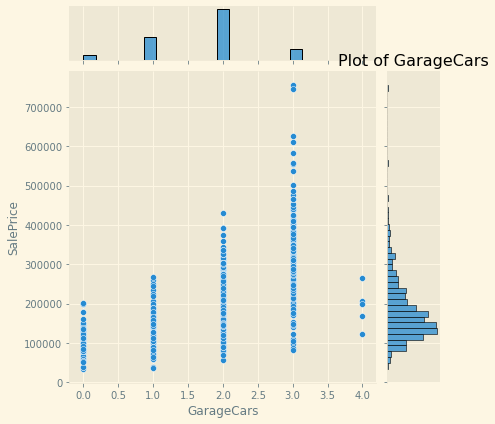

<Figure size 720x576 with 0 Axes>

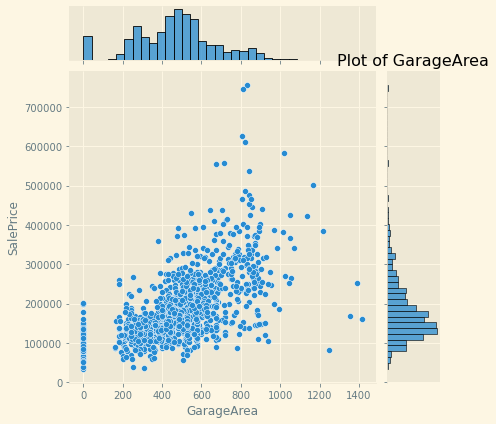

<Figure size 720x576 with 0 Axes>

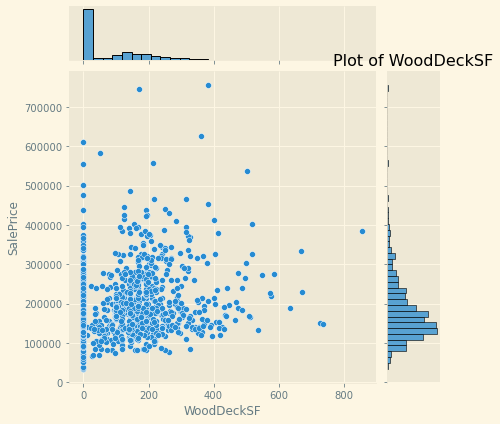

<Figure size 720x576 with 0 Axes>

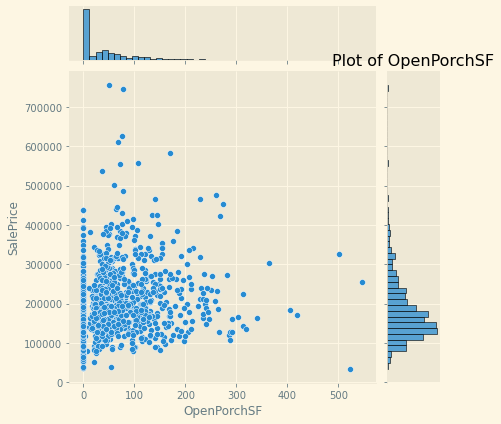

<Figure size 720x576 with 0 Axes>

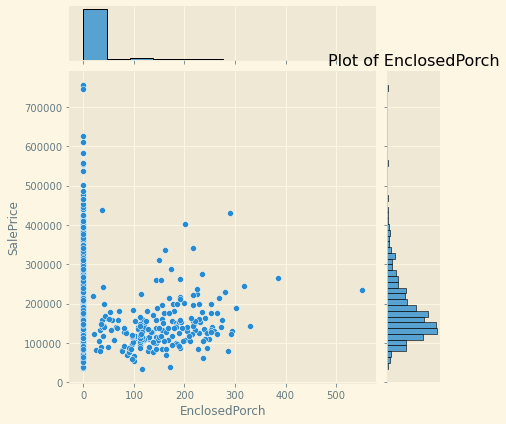

<Figure size 720x576 with 0 Axes>

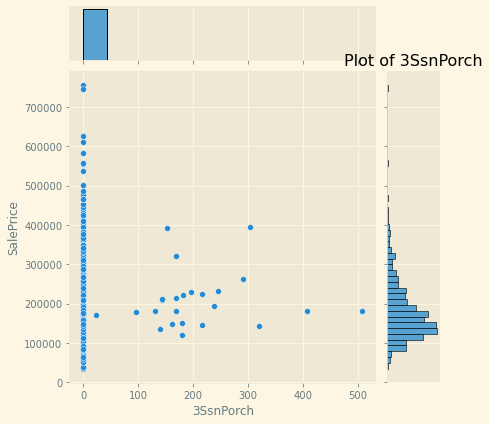

<Figure size 720x576 with 0 Axes>

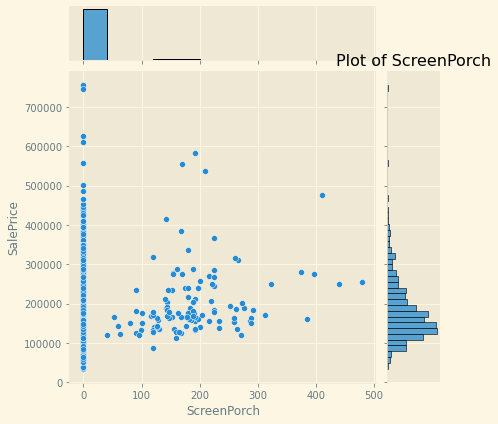

<Figure size 720x576 with 0 Axes>

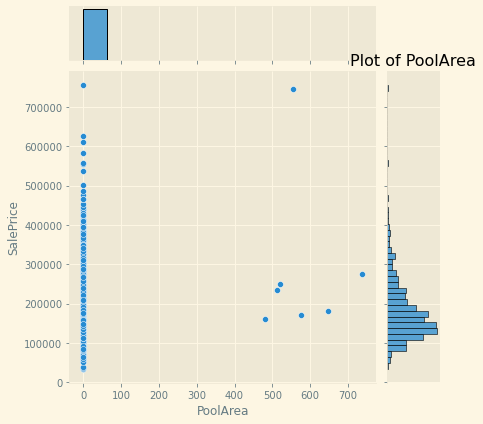

<Figure size 720x576 with 0 Axes>

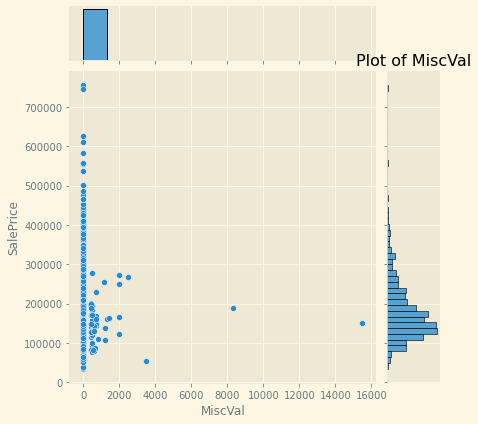

<Figure size 720x576 with 0 Axes>

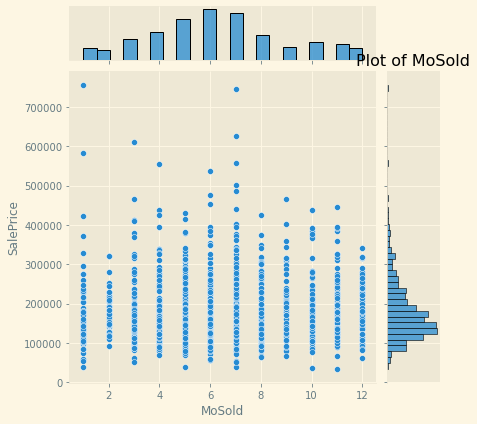

<Figure size 720x576 with 0 Axes>

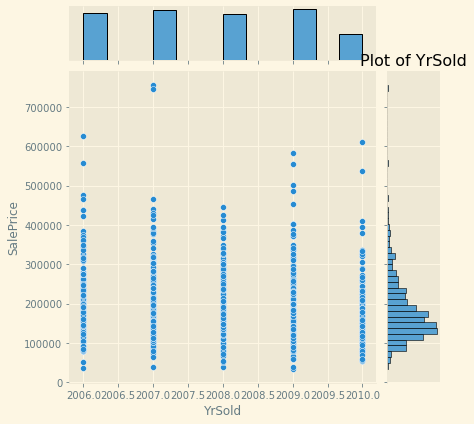

<Figure size 720x576 with 0 Axes>

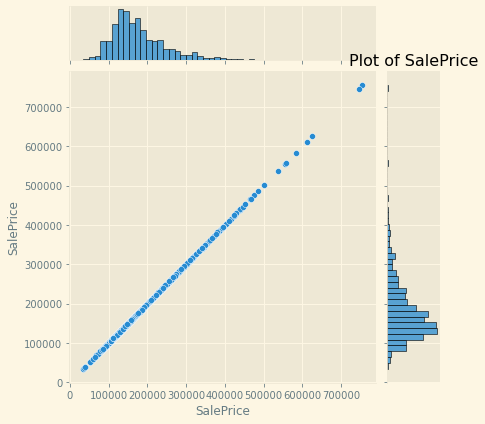

In [ ]:
for c in num_cols:
    num_viz(house, c)

Inferences:
   - There are many features where the values are binned belonging to different classes like `OverallQual`, `OverallCond`, `BsmtFullBath`, `BsmtHalfBath`, `BedroomAbvGr`, `KitchenAbcGr`, `TotRmsAbvGr`, `Fireplaces`, `GarageCars`, `MoSold`, `YrSold` etc
   - We can see some linear trends in features `TotalBsmtSF`, `1stFlrSF`, `GrLivArea` etc

In [ ]:
#defining a function to compute the distribution of numerical columns to understand the skewness and kurtosis

def dist_num(df, col):
    plt.figure(figsize=(10,4))
    plt.style.use('Solarize_Light2')
    
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()
    print("Skewness: %f" % house[col].skew())
    print("Kurtosis: %f" % house[col].kurt())

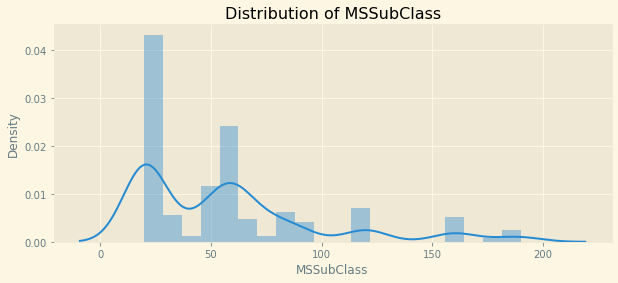

Skewness: 1.407657
Kurtosis: 1.580188


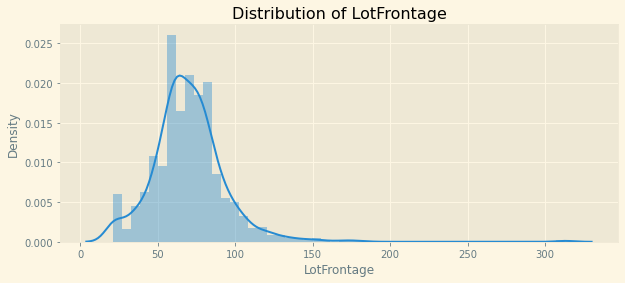

Skewness: 2.163569
Kurtosis: 17.452867


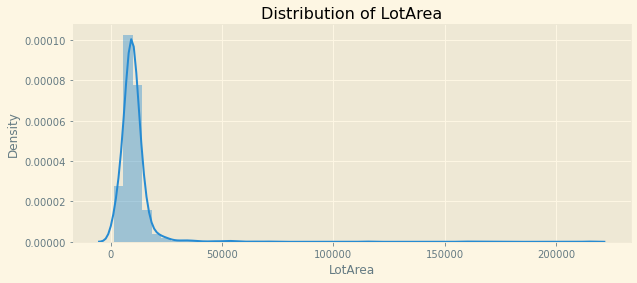

Skewness: 12.207688
Kurtosis: 203.243271


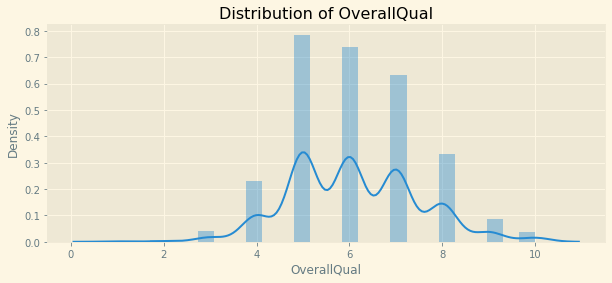

Skewness: 0.216944
Kurtosis: 0.096293


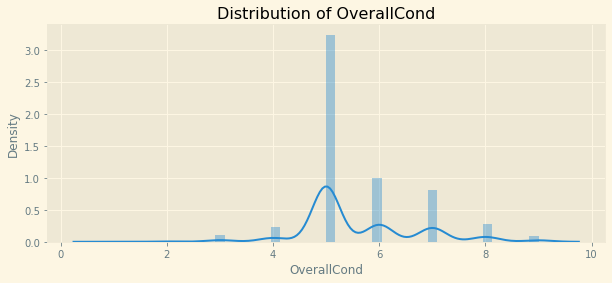

Skewness: 0.693067
Kurtosis: 1.106413


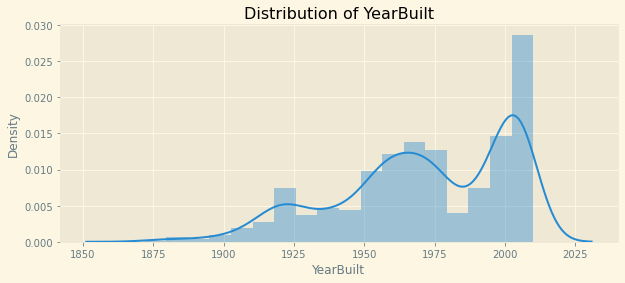

Skewness: -0.613461
Kurtosis: -0.439552


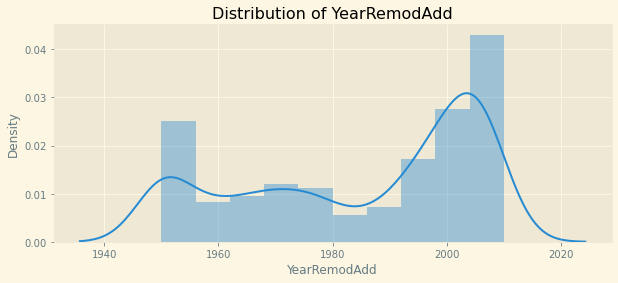

Skewness: -0.503562
Kurtosis: -1.272245


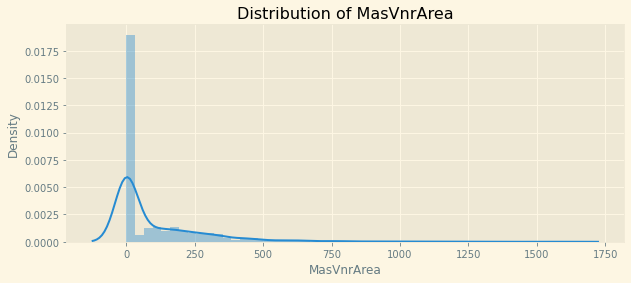

Skewness: 2.669084
Kurtosis: 10.082417


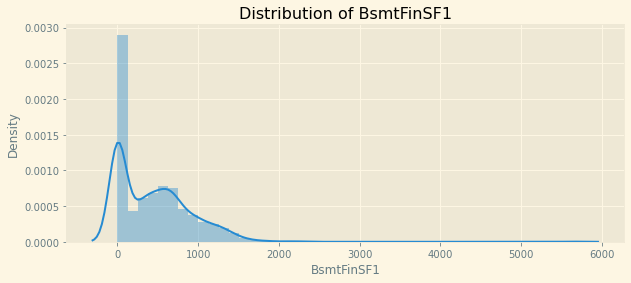

Skewness: 1.685503
Kurtosis: 11.118236


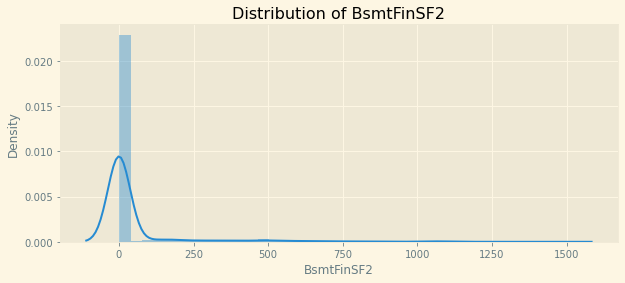

Skewness: 4.255261
Kurtosis: 20.113338


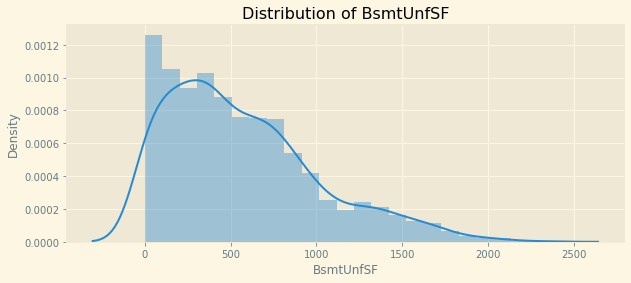

Skewness: 0.920268
Kurtosis: 0.474994


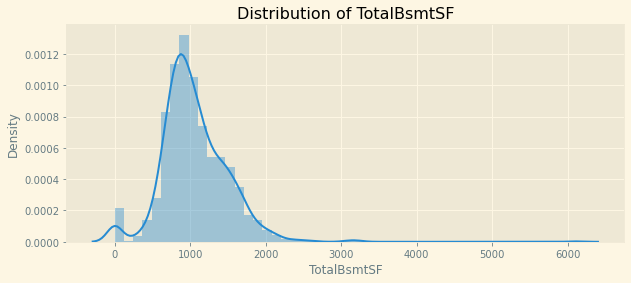

Skewness: 1.524255
Kurtosis: 13.250483


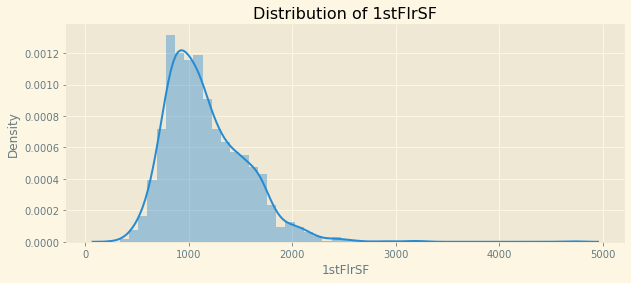

Skewness: 1.376757
Kurtosis: 5.745841


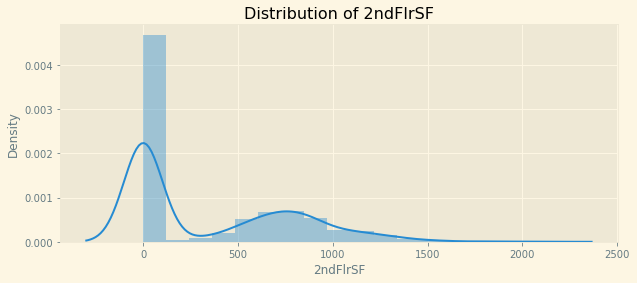

Skewness: 0.813030
Kurtosis: -0.553464


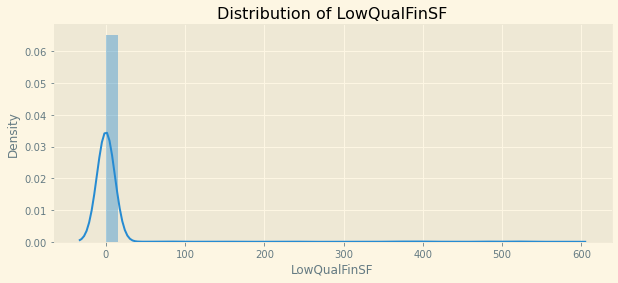

Skewness: 9.011341
Kurtosis: 83.234817


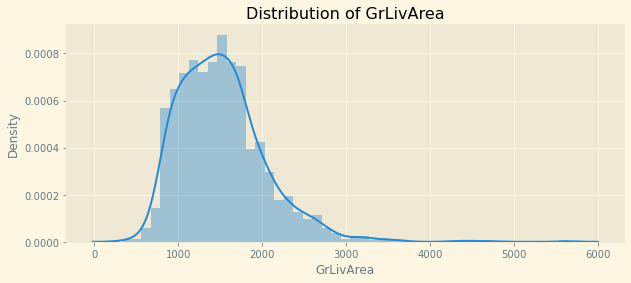

Skewness: 1.366560
Kurtosis: 4.895121


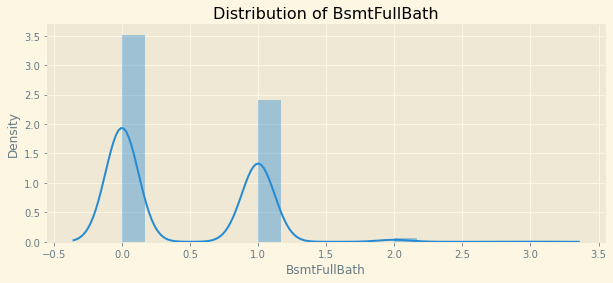

Skewness: 0.596067
Kurtosis: -0.839098


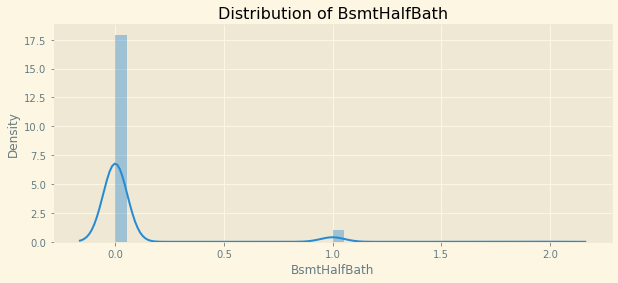

Skewness: 4.103403
Kurtosis: 16.396642


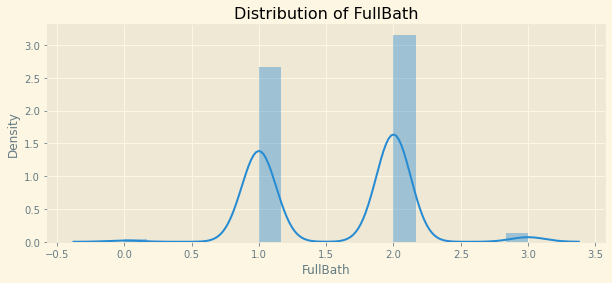

Skewness: 0.036562
Kurtosis: -0.857043


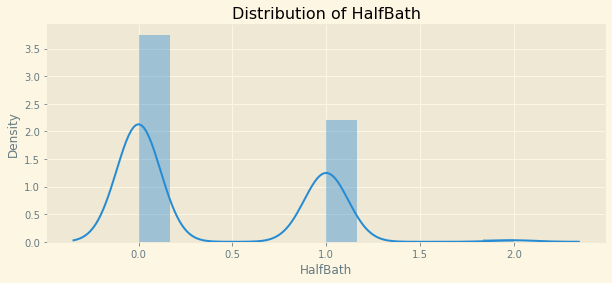

Skewness: 0.675897
Kurtosis: -1.076927


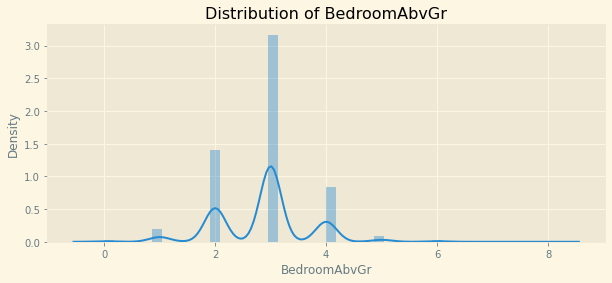

Skewness: 0.211790
Kurtosis: 2.230875


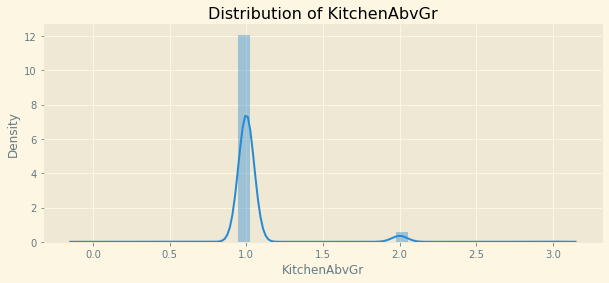

Skewness: 4.488397
Kurtosis: 21.532404


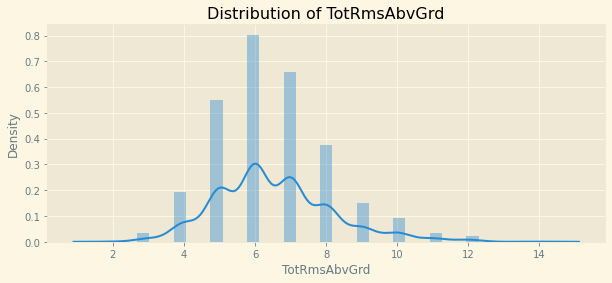

Skewness: 0.676341
Kurtosis: 0.880762


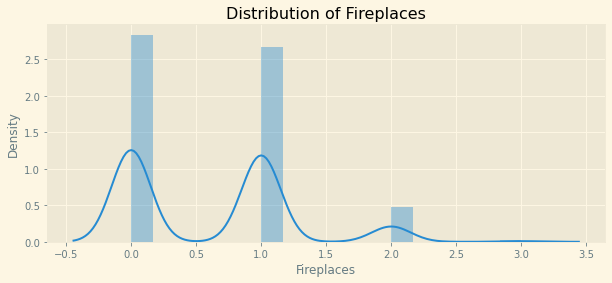

Skewness: 0.649565
Kurtosis: -0.217237


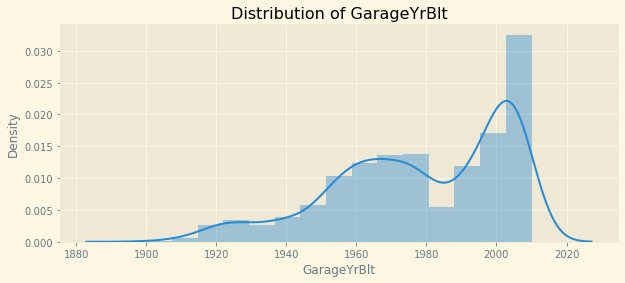

Skewness: -0.649415
Kurtosis: -0.418341


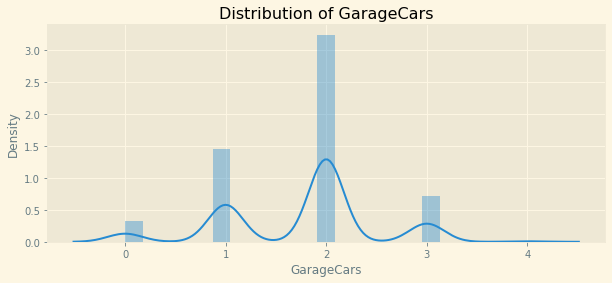

Skewness: -0.342549
Kurtosis: 0.220998


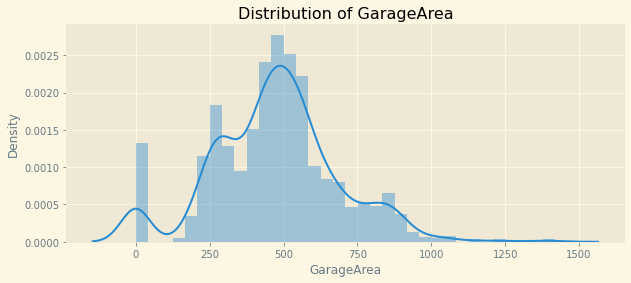

Skewness: 0.179981
Kurtosis: 0.917067


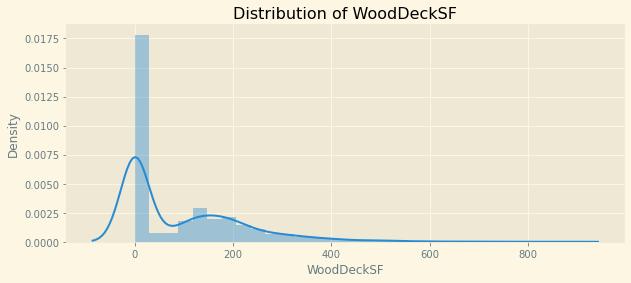

Skewness: 1.541376
Kurtosis: 2.992951


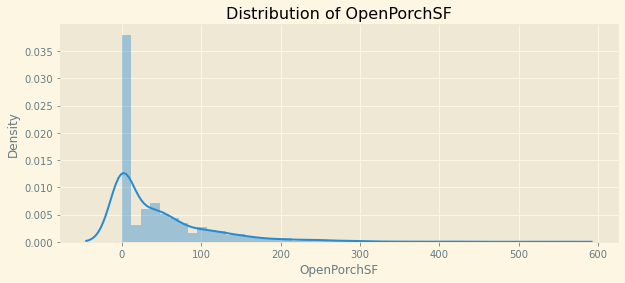

Skewness: 2.364342
Kurtosis: 8.490336


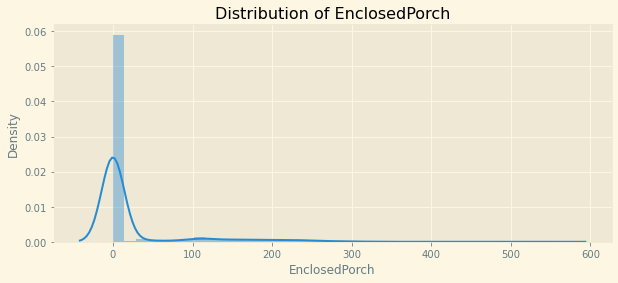

Skewness: 3.089872
Kurtosis: 10.430766


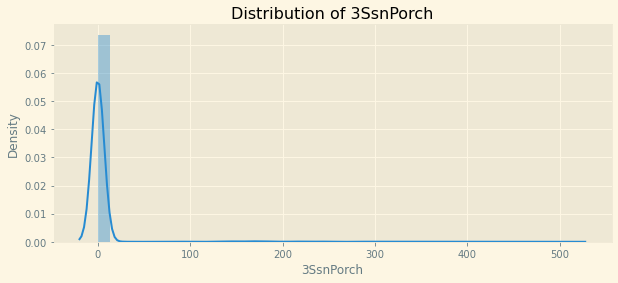

Skewness: 10.304342
Kurtosis: 123.662379


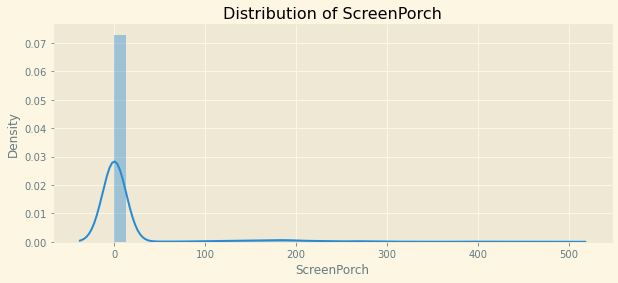

Skewness: 4.122214
Kurtosis: 18.439068


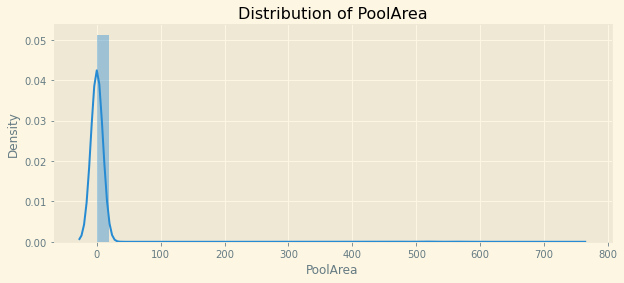

Skewness: 14.828374
Kurtosis: 223.268499


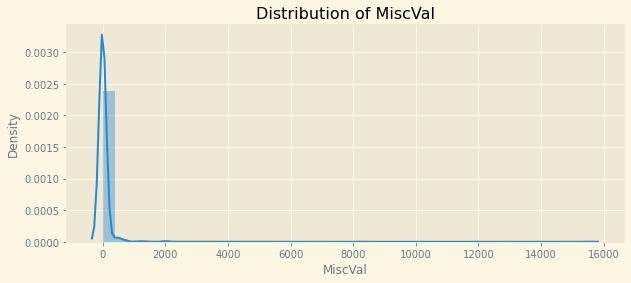

Skewness: 24.476794
Kurtosis: 701.003342


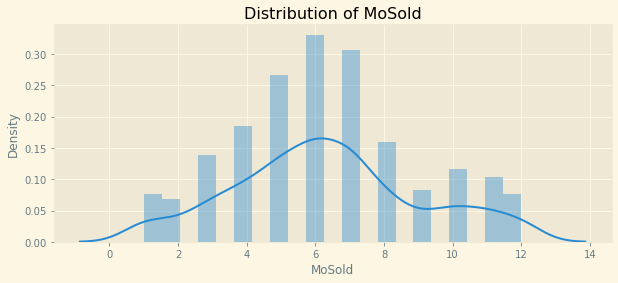

Skewness: 0.212053
Kurtosis: -0.404109


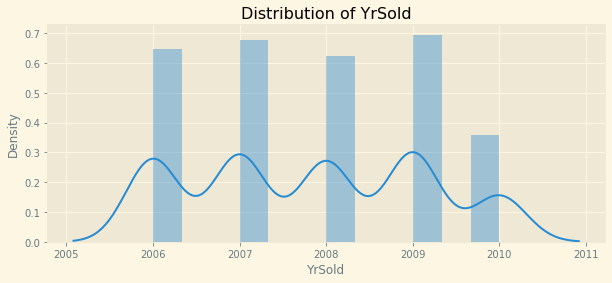

Skewness: 0.096269
Kurtosis: -1.190601


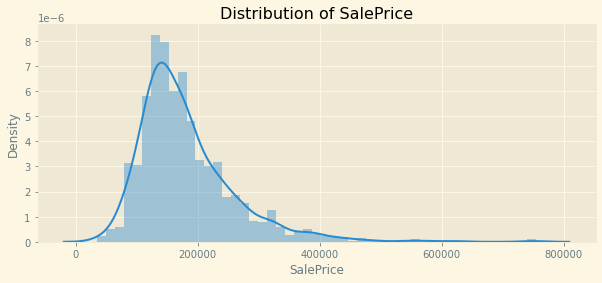

Skewness: 1.882876
Kurtosis: 6.536282


In [ ]:
for c in num_cols:
    dist_num(house, c)

- After going through the above distribution we see that there are many features where the data is completely right-skewed like `LotArea`, `MasVnrArea`, `BsmtFinSF2`, `LowQualFinSf`, `BsmtHalfBath`, `OpenPorchSf`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal`

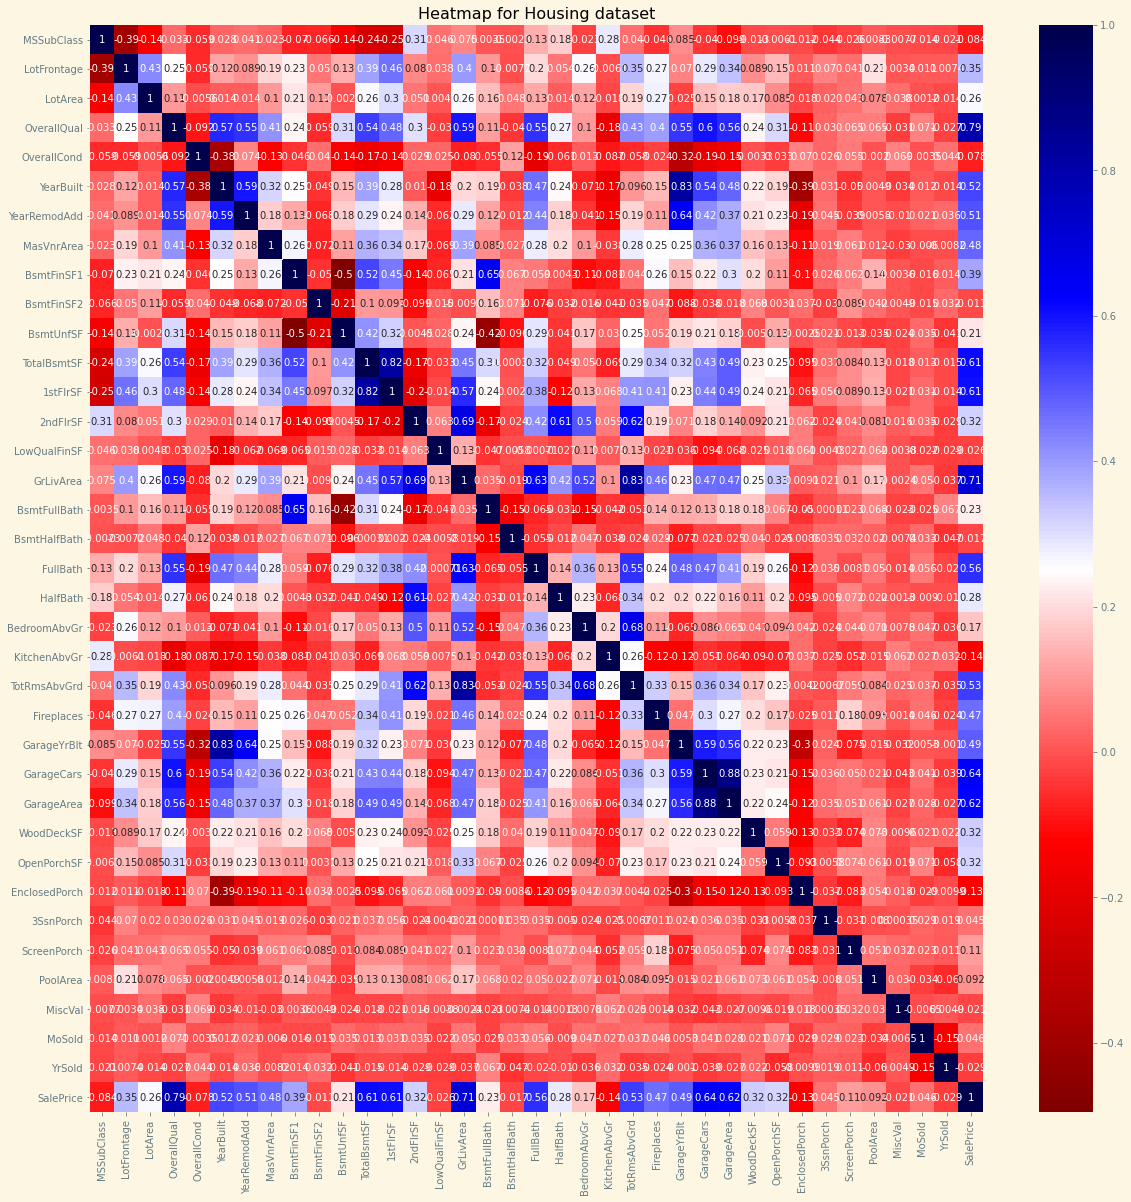

In [ ]:
# plotting the heatmap to understand correlation matrix of the dataset:

plt.figure(figsize=(20,20))
sns.heatmap(house.corr(), annot=True, cmap='seismic_r')
plt.title("Heatmap for Housing dataset")
plt.show()

Inference:
- The features having highest value of correlation in pairs are :
    1. `GarageYrBlt` and `YearBuilt` with value `0.83`
    2. `TotalBsmtSF` and `1stFlrSF` with value `0.82`
    3. `TotRmsAbvGrd` and `GrLivArea` with value `0.83`
    4. `GarageArea` and `GarageCars` with value `0.88`

- Features which have high correlation with our Target Variable, `SalePrice` are:
1. `OverallQual` with value `0.79`
2. `GrLivArea` with value `0.71`

## Data Preparation

###### Handling missing values

In [ ]:
# Lets see the missing values in depth
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(19)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtCond         37  0.025342
BsmtQual         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685

- There are many columns where null values is not  randomly missing, but NA has actually has meaning 

In [ ]:
meaningful_nan = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu",
                 "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

for i in meaningful_nan:
    house[i].fillna("NA", inplace=True)

In [ ]:
#again checking for null values in remaining dataset:
null_val = round(house.isnull().mean()*100,2)
null_val[null_val>0]

LotFrontage    17.74
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
GarageYrBlt     5.55
dtype: float64

In [ ]:
# column LotFrontage has many null values and all are numeric, so we can drop it:
house.drop('LotFrontage', axis=1, inplace=True)

Column 'MasVnrType' has a categorical data so we can impute it by making it as NA as we did earlier
Columns 'MasVnrArea','Electrical' and 'GarageYrBlt' can be imputed using median as they have numerical data

In [ ]:
house['MasVnrType'].fillna('NA', inplace=True)
house['MasVnrArea'].fillna(house['MasVnrArea'].median(),inplace=True)
house['GarageYrBlt'].fillna(house['GarageYrBlt'].median(),inplace=True)

In [ ]:
#again checking for null values in remaining dataset:
null_val = round(house.isnull().mean()*100,2)
null_val[null_val>0]

Electrical    0.07
dtype: float64

In [ ]:
# We can drop rest null data:
house.dropna(inplace=True)

In [ ]:
#again checking for null values in remaining dataset:
null_val = round(house.isnull().mean()*100,2)
null_val[null_val>0]

Series([], dtype: float64)

Clearly our data doesn't have any remaining null values

### Data Transformation

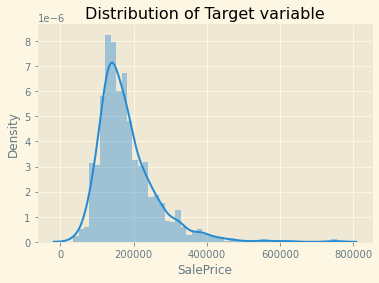

In [ ]:
sns.distplot(house["SalePrice"])
plt.title("Distribution of Target variable")
plt.show()

We can clearly see its not a perfect normal distribution, we may use a log transformation

In [ ]:
house['SalePrice'] = np.log(house['SalePrice'])

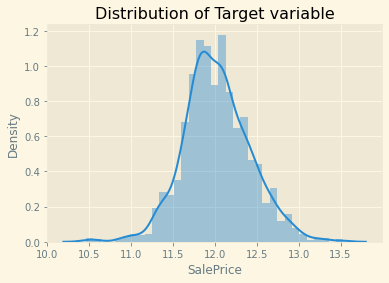

In [ ]:
#Lets again check the results of log transformation
sns.distplot(house["SalePrice"])
plt.title("Distribution of Target variable")
plt.show()

Now after using a log transformation on the target variable, we get a somewhat closer appearance of normal distribution

### Feature Engineering

We can create new features which are relative to the Age columns by calculating actual ages in years

In [ ]:
# converting the years columns to age:
years_cols = {'YearBuilt':'Age_YearBuilt',
              'YearRemodAdd':'Age_YearRemodAdd',
              'GarageYrBlt':'Age_GarageYrBlt'}

for x,y in years_cols.items():
    house[y] = house['YrSold'] - house[x]
    house.drop(x, axis=1, inplace=True)

    
house.drop('YrSold',axis=1, inplace=True)
house[['Age_YearBuilt','Age_YearRemodAdd','Age_GarageYrBlt']].head()

Age_YearBuilt  Age_YearRemodAdd  Age_GarageYrBlt
0              5                 5              5.0
1             31                31             31.0
2              7                 6              7.0
3             91                36              8.0
4              8                 8              8.0

In [ ]:
temp = ['MasVnrArea','Age_GarageYrBlt']
house[temp] = house[temp].astype(int)

##### Label Encoding

There are many columns where the columns have Ordinal Data and we can transform them into Numerical Ordered Form which will evetually help in Encoding for model building

In [ ]:
ordinal_cols = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual',
                'GarageCond','PoolQC']

house[ordinal_cols] = house[ordinal_cols].apply(lambda x:x.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}))

In [ ]:
house.head()

MSSubClass MSZoning  LotArea Street Alley LotShape LandContour Utilities  \
0          60       RL     8450   Pave    NA      Reg         Lvl    AllPub   
1          20       RL     9600   Pave    NA      Reg         Lvl    AllPub   
2          60       RL    11250   Pave    NA      IR1         Lvl    AllPub   
3          70       RL     9550   Pave    NA      IR1         Lvl    AllPub   
4          60       RL    14260   Pave    NA      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            7            5     Gable  CompShg     VinylSd     VinylSd   
1            6            8     Gable  CompShg     MetalSd     MetalSd   
2            7            5     Gable  CompShg     VinylSd     VinylSd   
3            7            5     Gable  CompShg     Wd Sdng     Wd Shng   
4            8            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0    BrkFace         196          4          3      PConc         4         3   
1       None           0          3          3     CBlock         4         3   
2    BrkFace         162          4          3      PConc         4         3   
3       None           0          3          3     BrkTil         3         4   
4    BrkFace         350          4          3      PConc         4         3   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA          5          Y      SBrkr       856       854   
1         1262    GasA          5          Y      SBrkr      1262         0   
2          920    GasA          5          Y      SBrkr       920       866   
3          756    GasA          4          Y      SBrkr       961       756   
4         1145    GasA          5          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  \
0             3             1            4             8        Typ   
1             3             1            3             6        Typ   
2             3             1            4             6        Typ   
3             3             1            4             7        Typ   
4             4             1            4             9        Typ   

   Fireplaces  FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
0           0            0     Attchd          RFn           2         548   
1           1            3     Attchd          RFn           2         460   
2           1            3     Attc

In [ ]:
#Lets check our final numerical and categorical columns:

cat_cols = house.select_dtypes(exclude = np.number).columns.to_list()
num_cols = house.select_dtypes(include = np.number).columns.to_list()

total_cols = np.array([[cat_cols],[num_cols]]).T
total_cols

array([[list(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']),
        list(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Po

###### One-Hot Encoding

Let's build Dummy variables using one_hot_encoding for all categorical columns:

In [ ]:
tempDF = pd.get_dummies(house[cat_cols])
house = pd.concat([house,tempDF], axis=1)

house.drop(cat_cols, axis=1, inplace=True)
house.head()

MSSubClass  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0          60     8450            7            5         196          4   
1          20     9600            6            8           0          3   
2          60    11250            7            5         162          4   
3          70     9550            7            5           0          3   
4          60    14260            8            5         350          4   

   ExterCond  BsmtQual  BsmtCond  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          3         4         3         706           0        150   
1          3         4         3         978           0        284   
2          3         4         3         486           0        434   
3          3         3         4         216           0        540   
4          3         4         3         655           0        490   

   TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          856          5       856       854             0       1710   
1         1262          5      1262         0             0       1262   
2          920          5       920       866             0       1786   
3          756          4       961       756             0       1717   
4         1145          5      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageCars  GarageArea  \
0            4             8           0            0           2         548   
1            3             6           1            3           2         460   
2            4             6           1            3           2         608   
3            4             7           1            4           3         642   
4            4             9           1            3           3         836   

   GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           3           3           0           61              0          0   
1           3           3         298            0              0          0   
2           3           3           0           42              0          0   
3           3           3           0           35            272          0   
4           3           3         192           84              0          0   

   ScreenPorch  PoolArea  PoolQC  MiscVal  MoSold  SalePrice  Age_YearBuilt  \
0            0         0       0        0       2  12.247694              5   
1            0         0       0        0       5  12.109011             31   
2            0         0       0        0       9  12.317167              7   
3            0         0       0        0       2  11.849398             91   
4            0         0       0        0      12  12.429216              8   

   Age_YearRemodAdd  Age_GarageYrBlt  MSZoning_C (all)  MSZoning_FV  \
0                 5                5                 0            0   
1                31               31                 0            0   
2                 6                7                 0            0   
3                36                8                 0            0   
4                 8                8                 0            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Grvl  Street_Pave  \
0            0            1            0            0            1   
1            0            1            0            0            1   
2            0            1            0            0            1   
3            0            1            0   

In [ ]:
#Checking if there are any categorical data left:
print(house.select_dtypes(exclude=np.number).columns.to_list())

[]


## Model Building

In [ ]:
y = house.pop('SalePrice')
X = house

In [ ]:
X.head()

MSSubClass  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0          60     8450            7            5         196          4   
1          20     9600            6            8           0          3   
2          60    11250            7            5         162          4   
3          70     9550            7            5           0          3   
4          60    14260            8            5         350          4   

   ExterCond  BsmtQual  BsmtCond  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          3         4         3         706           0        150   
1          3         4         3         978           0        284   
2          3         4         3         486           0        434   
3          3         3         4         216           0        540   
4          3         4         3         655           0        490   

   TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          856          5       856       854             0       1710   
1         1262          5      1262         0             0       1262   
2          920          5       920       866             0       1786   
3          756          4       961       756             0       1717   
4         1145          5      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageCars  GarageArea  \
0            4             8           0            0           2         548   
1            3             6           1            3           2         460   
2            4             6           1            3           2         608   
3            4             7           1            4           3         642   
4            4             9           1            3           3         836   

   GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           3           3           0           61              0          0   
1           3           3         298            0              0          0   
2           3           3           0           42              0          0   
3           3           3           0           35            272          0   
4           3           3         192           84              0          0   

   ScreenPorch  PoolArea  PoolQC  MiscVal  MoSold  Age_YearBuilt  \
0            0         0       0        0       2              5   
1            0         0       0        0       5             31   
2            0         0       0        0       9              7   
3            0         0       0        0       2             91   
4            0         0       0        0      12              8   

   Age_YearRemodAdd  Age_GarageYrBlt  MSZoning_C (all)  MSZoning_FV  \
0                 5                5                 0            0   
1                31               31                 0            0   
2                 6                7                 0            0   
3                36                8                 0            0   
4                 8                8                 0            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Grvl  Street_Pave  \
0            0            1            0            0            1   
1            0            1            0            0            1   
2            0            1            0            0            1   
3            0            1            0            0            1   
4            0            1            

In [ ]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

We'll first split the dataset into train and test

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [ ]:
X_test.head()

MSSubClass  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
789          60    12205            6            8         157          3   
425          60     3378            7            8           0          3   
204          50     3500            5            7           0          3   
118          60    12376            7            5           0          3   
244          60     8880            7            5           0          4   

     ExterCond  BsmtQual  BsmtCond  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
789          3         3         2         568           0        264   
425          4         3         3           0           0        651   
204          3         3         3         312           0        408   
118          3         4         3        1470           0        203   
244          3         4         3         695           0        253   

     TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
789          832          4       976      1111             0       2087   
425          651          4       707       682             0       1389   
204          720          3       720       564             0       1284   
118         1673          4      1699      1523             0       3222   
244          948          5      1222       888             0       2110   

     BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
789             0             0         2         1             5   
425             0             0         1         1             3   
204             0             0         1         1             2   
118             1             0         3         0             5   
244             1             0         2         1             3   

     KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  \
789             1            4             9           0            0   
425             1            3             6           2            4   
204             1            3             5           0            0   
118             1            4            11           2            3   
244             1            4             8           2            2   

     GarageCars  GarageArea  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  \
789           2         444           3           3         133          168   
425           1         240           3           3           0            0   
204           1         240           3           3           0           35   
118           3         594           3           3         367            0   
244           2         463           3           3           0          130   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  MiscVal  MoSold  \
789              0          0            0         0       0        0       7   
425            126          0            0         0       0        0       9   
204              0          0            0         0       0        0       4   
118              0          0            0         0       0        0       5   
244              0          0            0         0       0        0       5   

     Age_YearBuilt  Age_YearRemodAdd  Age_GarageYrBlt  MSZoning_C (all)  \
789             41                 0               41                 0   
425             63                17               62                 0   
204             62                59               61                 0   
118             20                20               20                 0   
244             16                 8               16                 0   

     MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Grvl  \
789            0            0            1            0            0   
425            0            0            0            1            0   
204            0            0            0            1            0   
118            0            0            1            0            0   
244          

In [ ]:
y_test.head()

789    12.141534
425    11.813030
204    11.608236
118    12.676076
244    12.230765
Name: SalePrice, dtype: float64

In [ ]:
scaler = MinMaxScaler()

cols_to_scale = ['Age_GarageYrBlt','Age_YearRemodAdd','Age_YearBuilt','MoSold','EnclosedPorch','OpenPorchSF',
                 'WoodDeckSF','GarageCond','GarageQual','GarageArea','GarageCars','FireplaceQu','Fireplaces',
                 'TotRmsAbvGrd','KitchenQual','KitchenAbvGr',
                 'BedroomAbvGr','HalfBath','FullBath','BsmtHalfBath','BsmtFullBath','GrLivArea','LowQualFinSF',
                 '2ndFlrSF','1stFlrSF','HeatingQC','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1',
                 'BsmtCond','BsmtQual','ExterCond','ExterQual','MasVnrArea',
                 'OverallCond','OverallQual','LotArea','MSSubClass']

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

#### Linear Regression

In [ ]:
LR=LinearRegression()
LR.fit(X_train,y_train)

X_train_pred = LR.predict(X_train)
X_test_pred = LR.predict(X_test)

print("R-Squared for Train: ",round(r2_score(y_train , X_train_pred),4))
print("Mean-Squared-Error for Train: ",round(mean_squared_error(y_train , X_train_pred),4))

print("R-Squared for Test: ",round(r2_score(y_test, X_test_pred),4))
print("Mean-Squared-Error for Test: ",round(mean_squared_error(y_test, X_test_pred),4))

R-Squared for Train:  0.9497
Mean-Squared-Error for Train:  0.0082
R-Squared for Test:  0.7405
Mean-Squared-Error for Test:  0.0391


We can clearly observe that the difference between the R-Squared on Train and Test is huge, indicating the overfitting of our model

#### Ridge

In [ ]:
# Starting with Ridge regression and using RFE for feature selection

ridge=Ridge()

# Running RFE
rfe = RFE(ridge,25)
rfe=rfe.fit(X_train,y_train)

# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [ ]:
X_train_rfe2= X_train[col]
X_test_rfe2= X_test[col]

In [ ]:
# Applying Ridge
ridge = Ridge()

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
folds = 5
ridge_model = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model.fit(X_train_rfe2, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
GridSearch_Ridge = pd.DataFrame(ridge_model.cv_results_)
GridSearch_Ridge.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.004788      0.000746         0.003191        0.000747      0.0001   
1       0.004588      0.000488         0.002992        0.000892       0.001   
2       0.004987      0.001093         0.002793        0.000399        0.01   
3       0.005186      0.000746         0.003391        0.000488        0.05   
4       0.005586      0.001016         0.002792        0.000746         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.078991          -0.092080          -0.102023   
1   {'alpha': 0.001}          -0.079003          -0.092058          -0.102023   
2    {'alpha': 0.01}          -0.079118          -0.091874          -0.102032   
3    {'alpha': 0.05}          -0.079596          -0.091432          -0.102156   
4     {'alpha': 0.1}          -0.080190          -0.091233          -0.102377   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.097118          -0.084389        -0.090920        0.008343   
1          -0.097112          -0.084387        -0.090917        0.008338   
2          -0.097061          -0.084403        -0.090897        0.008293   
3          -0.096834          -0.084940        -0.090992        0.008068   
4          -0.096566          -0.085608        -0.091195        0.007826   

   rank_test_score  split0_train_score  split1_train_score  \
0                3           -0.085476           -0.081290   
1                2           -0.085483           -0.081290   
2                1           -0.085556           -0.081312   
3                4           -0.085961           -0.081640   
4                5           -0.086570           -0.082221   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.079067           -0.083829           -0.083193   
1           -0.079072           -0.083831           -0.083200   
2           -0.079125           -0.083849           -0.083270   
3           -0.079382           -0.083925           -0.083606   
4           -0.079764           -0.084024           -0.084089   

   mean_train_score  std_train_score  
0         -0.082571         0.002206  
1         -0.082575         0.002207  
2         -0.082622         0.002213  
3         -0.082903         0.002231  
4         -0.083334         0.002258

In [ ]:
ridge_model.best_params_

{'alpha': 0.01}

In [ ]:
alpha = 0.01
ridge = Ridge(alpha=alpha)     
ridge.fit(X_train_rfe2, y_train)

Ridge(alpha=0.01)

In [ ]:
ridge.coef_

array([ 0.43001329,  0.60571283,  0.39113888,  0.07693514,  0.42708304,
        0.59883359,  0.56885621,  0.23726881,  0.82306747,  0.08420989,
       -0.31268093,  0.07837753,  0.08816096,  0.26752566, -0.50093318,
       -0.34430691,  0.11638343,  0.16886695, -0.14547683, -0.93336349,
       -0.14476967, -2.86738899, -0.28998054, -0.2134311 , -0.4725864 ])

In [ ]:
X_train_pred = ridge.predict(X_train_rfe2)
X_test_pred = ridge.predict(X_test_rfe2)

print("R-Squared for Train: ",round(r2_score(y_train , X_train_pred),4))
print("Mean-Squared-Error for Train: ",round(mean_squared_error(y_train , X_train_pred),4))

print("R-Squared for Test: ",round(r2_score(y_test, X_test_pred),4))
print("Mean-Squared-Error for Test: ",round(mean_squared_error(y_test, X_test_pred),4))

R-Squared for Train:  0.9161
Mean-Squared-Error for Train:  0.0137
R-Squared for Test:  0.8727
Mean-Squared-Error for Test:  0.0192


In [ ]:
ridge_coeff_dict = pd.DataFrame(ridge.coef_,X_train_rfe2.columns)
ridge_coeff_dict.reset_index(level=0, inplace=True)
ridge_coeff_dict.columns = ['Column Name','Coefficients']
ridge_coeff_dict.sort_values(by='Coefficients', ascending= False)

Column Name  Coefficients
8              GrLivArea      0.823067
1            OverallQual      0.605713
5            TotalBsmtSF      0.598834
6               1stFlrSF      0.568856
0                LotArea      0.430013
4             BsmtFinSF1      0.427083
2            OverallCond      0.391139
13            GarageArea      0.267526
7               2ndFlrSF      0.237269
17  Neighborhood_Crawfor      0.168867
16  Neighborhood_ClearCr      0.116383
12            GarageCars      0.088161
9           BsmtFullBath      0.084210
11          TotRmsAbvGrd      0.078378
3               BsmtQual      0.076935
20        BldgType_Twnhs     -0.144770
18  Neighborhood_MeadowV     -0.145477
23       Foundation_Wood     -0.213431
22   Exterior1st_BrkComm     -0.289981
10          KitchenAbvGr     -0.312681
15      MSZoning_C (all)     -0.344307
24        Functional_Sev     -0.472586
14         Age_YearBuilt     -0.500933
19       Condition2_PosN     -0.933363
21      RoofMatl_ClyTile     -2.867389

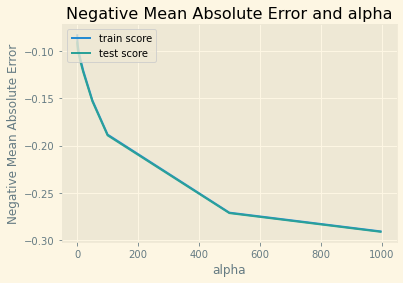

In [ ]:
# plotting mean test and train scoes with alpha 
GridSearch_Ridge['param_alpha'] = GridSearch_Ridge['param_alpha'].astype('float32')

# plotting
plt.plot(GridSearch_Ridge['param_alpha'], GridSearch_Ridge['mean_train_score'])
plt.plot(GridSearch_Ridge['param_alpha'], GridSearch_Ridge['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From the above plot, we can clearly observe that as value of aplha increases, the Neg Mean Absolute Error also increases, indicating a direct proportionality

#### LASSO

In [ ]:
# Applying Lasso
lasso = Lasso()

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

folds = 5
lasso_model = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
GridSearch_Lasso = pd.DataFrame(lasso_model.cv_results_)
GridSearch_Lasso.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.112697      0.025761         0.003990    2.431402e-07      0.0001   
1       0.023534      0.004447         0.005985    1.092972e-03       0.001   
2       0.017553      0.001621         0.006190    1.322077e-03        0.01   
3       0.016357      0.002862         0.005985    8.915380e-04        0.05   
4       0.014562      0.003130         0.005783    1.466149e-03         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.078404          -0.088317          -0.098149   
1   {'alpha': 0.001}          -0.089243          -0.097128          -0.100517   
2    {'alpha': 0.01}          -0.133179          -0.145670          -0.153513   
3    {'alpha': 0.05}          -0.232542          -0.239579          -0.241802   
4     {'alpha': 0.1}          -0.304904          -0.306987          -0.313984   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.089811          -0.083838        -0.087704        0.006563   
1          -0.087072          -0.093374        -0.093467        0.004937   
2          -0.131480          -0.143949        -0.141558        0.008214   
3          -0.214463          -0.246352        -0.234948        0.011171   
4          -0.283953          -0.315962        -0.305158        0.011382   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.066657           -0.061606   
1                2           -0.085622           -0.082128   
2                3           -0.139554           -0.135433   
3                4           -0.231145           -0.230705   
4                5           -0.301576           -0.300748   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.059145           -0.065794           -0.064397   
1           -0.077857           -0.078969           -0.085112   
2           -0.133959           -0.136621           -0.136442   
3           -0.232930           -0.234740           -0.230674   
4           -0.301744           -0.305139           -0.299872   

   mean_train_score  std_train_score  
0         -0.063520         0.002778  
1         -0.081938         0.003135  
2         -0.136402         0.001838  
3         -0.232039         0.001583  
4         -0.301816         0.001790

In [ ]:
#lets check the best value of alpha according to GridSearchCV
lasso_model.best_params_

{'alpha': 0.0001}

In [ ]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)     
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [ ]:
lasso.coef_

array([-5.85837731e-02,  3.07662115e-01,  3.67154011e-01,  2.89458177e-01,
        1.39801033e-02,  0.00000000e+00, -5.30530296e-02,  6.58430051e-02,
        1.72118775e-02,  2.33030941e-01,  2.31340834e-02, -0.00000000e+00,
        4.25468573e-01,  6.53654851e-02,  1.35911985e-02,  0.00000000e+00,
       -4.16708573e-02,  1.20195152e+00,  9.38675215e-02,  0.00000000e+00,
        5.50370447e-02,  3.16726324e-02,  0.00000000e+00, -6.82793593e-02,
        5.66982041e-02,  9.03185846e-02,  2.63005366e-02,  3.30810266e-02,
        6.25698528e-02,  2.39223716e-01,  1.61509220e-01,  0.00000000e+00,
        7.08021307e-02,  5.80438776e-03,  3.00926612e-02,  1.79026481e-04,
        1.51531605e-04,  7.22340355e-05,  0.00000000e+00,  3.45564222e-06,
       -9.28410700e-03, -2.25646529e-01, -4.60105439e-02,  2.40801644e-02,
       -4.11553129e-01,  1.63700407e-02,  3.49016596e-02, -0.00000000e+00,
       -3.35175359e-02, -2.06905991e-02,  0.00000000e+00, -1.25139314e-02,
        0.00000000e+00,  

Lets check our model performance on Train and Test data:

In [ ]:
X_train_pred = lasso.predict(X_train)
X_test_pred = lasso.predict(X_test)

print("R-Squared for Train: ",round(r2_score(y_train , X_train_pred),4))
print("Mean-Squared-Error for Train: ",round(mean_squared_error(y_train , X_train_pred),4))

print("R-Squared for Test: ",round(r2_score(y_test, X_test_pred),4))
print("Mean-Squared-Error for Test: ",round(mean_squared_error(y_test, X_test_pred),4))

R-Squared for Train:  0.9468
Mean-Squared-Error for Train:  0.0087
R-Squared for Test:  0.9005
Mean-Squared-Error for Test:  0.015


In [ ]:
lasso_coeff_dict = pd.DataFrame(lasso.coef_,X_train.columns)
lasso_coeff_dict.reset_index(level=0, inplace=True)
lasso_coeff_dict.columns = ['Column Name','Coefficients']
lasso_coeff_dict.sort_values(by='Coefficients', ascending= False, inplace=True)
lasso_coeff_dict

Column Name  Coefficients
17             GrLivArea      1.201952
12           TotalBsmtSF      0.425469
2            OverallQual      0.367154
1                LotArea      0.307662
3            OverallCond      0.289458
..                   ...           ...
143  Exterior1st_BrkComm     -0.175573
41         Age_YearBuilt     -0.225647
44      MSZoning_C (all)     -0.411553
110      Condition2_PosN     -0.773191
133     RoofMatl_ClyTile     -2.247307

[261 rows x 2 columns]

In [ ]:
X_train.head()

MSSubClass   LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
984     0.411765  0.040455     0.444444        0.500       0.000   0.333333   
1416    1.000000  0.046139     0.333333        0.625       0.000   0.333333   
390     0.176471  0.032409     0.444444        0.875       0.000   0.333333   
877     0.235294  0.034416     0.888889        0.500       0.135   0.666667   
567     0.000000  0.040670     0.666667        0.500       0.105   0.666667   

      ExterCond  BsmtQual  BsmtCond  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
984    0.333333       0.0      0.00    0.000000    0.000000   0.000000   
1416   0.333333       0.6      0.75    0.000000    0.000000   0.332620   
390    0.333333       0.6      1.00    0.042700    0.265265   0.098031   
877    0.333333       1.0      0.75    0.207300    0.000000   0.125000   
567    0.333333       0.8      0.75    0.000354    0.000000   0.648545   

      TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
984      0.000000       0.50  0.215278  0.209201           0.0   0.249039   
1416     0.127169       0.75  0.202315  0.505569           0.0   0.355880   
390      0.140917       1.00  0.136343  0.196610           0.0   0.178517   
877      0.239280       1.00  0.252315  0.369007           0.0   0.343198   
567      0.248282       1.00  0.269213  0.000000           0.0   0.210799   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
984       0.000000           0.0  0.666667       0.0         0.500   
1416      0.000000           0.0  0.666667       0.0         0.500   
390       0.333333           0.0  0.333333       0.0         0.500   
877       0.333333           0.0  0.666667       0.5         0.500   
567       0.000000           0.0  0.666667       0.0         0.375   

      KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  \
984       0.666667     0.666667      0.454545    0.000000          0.0   
1416      0.666667     0.333333      0.727273    0.000000          0.0   
390       0.333333     0.333333      0.363636    0.000000          0.0   
877       0.333333     1.000000      0.636364    0.333333          0.8   
567       0.333333     0.666667      0.363636    0.000000          0.0   

      GarageCars  GarageArea  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  \
984         0.50    0.380113         0.6         0.6    0.000000      0.00000   
1416        0.50    0.394922         0.6         0.6    0.000000      0.00000   
390         0.25    0.270804         0.6         0.6    0.000000      0.23766   
877         0.75    0.520451         0.6         0.6    0.214702      0.00000   
567         0.50    0.375176         0.6         0.6    0.000000      0.00000   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  MiscVal  \
984        0.000000          0            0         0       0        0   
1416       0.206522          0            0         0       0        0   
390        0.202899          0            0         0       0        0   
877        0.000000          0            0         0       0        0   
567        0.000000          0            0         0       0        0   

        MoSold  Age_YearBuilt  Age_YearRemodAdd  Age_GarageYrBlt  \
984   0.636364       0.235294          0.540984         0.299065   
1416  0.272727       0.919118          1.000000         0.364486   
390   0.272727       0.794118          0.967213         0.280374   
877   0.454545       0.036765          0.081967         0.046729   
567   0.181818       0.044118          0.114754         0.056075   

      MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
984                  0            0            0            1            0   
1416                 0            0            0            0            1   
390                  0            0            0            1            0   
877                  0            0            0            1            0   
567                  0    

## Conclusions:

In [ ]:
conclusion = pd.DataFrame({'Metric':['R2_Score (Train)','R2_Score (Test)','MSE (Train)','MSE (Test)'],
                          'Linear':['0.9497','0.7405','0.0146','0.0391'],
                          'Ridge':['0.9160','0.8728','0.0146','0.0191'],
                          'Lasso':['0.9468','0.9005','0.0087','0.015']
                          })
conclusion

Metric  Linear   Ridge   Lasso
0  R2_Score (Train)  0.9497  0.9160  0.9468
1   R2_Score (Test)  0.7405  0.8728  0.9005
2       MSE (Train)  0.0146  0.0146  0.0087
3        MSE (Test)  0.0391  0.0191   0.015

- While comparing all the metrics of linear, Ridge and Lasso we find that the best performing model is Lasso which has R2 value of 0.94 on train and 0.90 on test dataset. 
- Also, The Mean-Squared-Error for Lasso is also minimum as compared to the rest, having only 0.0087 on train and 0.015 on test dataset

###### Top 10 significant features for our final model are:

In [ ]:
lasso_coeff_dict.head(10)

Column Name  Coefficients
17              GrLivArea      1.201952
12            TotalBsmtSF      0.425469
2             OverallQual      0.367154
1                 LotArea      0.307662
3             OverallCond      0.289458
29             GarageArea      0.239224
9              BsmtFinSF1      0.233031
30             GarageQual      0.161509
78   Neighborhood_Crawfor      0.158423
109       Condition2_PosA      0.130684

Clearly, we can see Top features are `'GrLivArea'`, `'OverallQual'`, `'TotalBsmtSF'`, `'OverallCond'`,` 'GarageArea'`

###### The Optimal value for Lambda:
- In case of `Ridge`, lambda = `0.01`
- In case of `Lasso`, lambda = `0.0001`